# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. \
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). \
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import pylab
import seaborn as sns
from IPython.display import Markdown, display
import math
import numpy as np
import scipy as sp
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.ticker as ticker

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

FILE_PATH = 'games.csv'

In [2]:
def printmd(string):
    display(Markdown(string))
    
def read_file(file_path, sep_s, tab_desc):
    dataset = pd.read_csv(file_path, sep=sep_s)
    dataset.columns = map(str.lower, dataset.columns)
    print()
    printmd("**" + tab_desc + "**")
    printmd("**Структура данных**")
    dataset.info()
    printmd("**Пустые значения**")
    print(dataset.isna().sum())
    return dataset

# Подготовка данных для исследования

## Загрузка данных 

In [3]:
games_dataset = read_file(FILE_PATH, ',', 'Игры')
display(games_dataset.head())

**Игры**

**Структура данных**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Пустые значения**

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных** \
name — название игры\
platform — платформа\
year_of_release — год выпуска\
genre — жанр игры\
na_sales — продажи в Северной Америке (миллионы проданных копий)\
eu_sales — продажи в Европе (миллионы проданных копий)\
jp_sales — продажи в Японии (миллионы проданных копий)\
other_sales — продажи в других странах (миллионы проданных копий)\
critic_score — оценка критиков (максимум 100)\
user_score — оценка пользователей (максимум 10)\
rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обработка данных 

Приведем строковые поля к нижнему регистру, год выпуска приведем к целому числу

In [4]:
str_columns = ['name','platform','genre']
for i in str_columns:
    games_dataset[i] = games_dataset[i].str.lower()

int_columns = ['year_of_release']
for i in int_columns:
    games_dataset[i] = games_dataset[i].astype('Int64') 

Удалим игры с пустым названием

In [5]:
games_dataset.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заменим устаревшее обозначение рейтинга на современное

In [6]:
games_dataset['rating'] = games_dataset['rating'].replace('K-A', 'E')

Добавим категорию для оценок пользователей: определена, подлежит уточнению, не определена , после этого заменим tbd на NaN и приведем к числовому типу

In [7]:
games_dataset['user_score_cat'] = games_dataset['user_score'].apply(lambda x: 'подлежит уточнению' if x == 'tbd' else ('не определена' if x != x else 'определена'))
print(games_dataset['user_score_cat'].value_counts())
games_dataset['user_score'] = games_dataset['user_score'].replace('tbd', np.NaN)
games_dataset['user_score'] = pd.to_numeric(games_dataset['user_score'])

определена            7590
не определена         6701
подлежит уточнению    2424
Name: user_score_cat, dtype: int64


In [8]:
if games_dataset.duplicated().sum() > 0:
    printmd('**На удаление **' + games_dataset.duplicated().sum() + "дубликатов")
    games_dataset.drop_duplicates().reset_index(drop=True)  
else: printmd('Проверим дубликаты: дубликатов нет!')

Проверим дубликаты: дубликатов нет!

Добавим суммарные продажи во всех регионах - так как NaN в этих столбцах нет, то просто сложим

In [9]:
games_dataset['sales'] = games_dataset['na_sales'] + games_dataset['eu_sales'] + games_dataset['jp_sales'] + games_dataset['other_sales'] 

Так как в процессе анализа обнаружена игра, вышедшая для платформы, когда платформа еще не существовала - удалим ее

In [10]:
games_dataset.drop(games_dataset[(games_dataset['platform'] == 'ds')&(games_dataset['year_of_release'] < 2000)].index, inplace=True)

В итоге получилась таблица:

In [11]:
games_dataset.info()
display(games_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  user_score_cat   16714 non-null  object 
 12  sales            16714 non-null  float64
dtypes: Int64(1), float64(7), object(5)
memory usage: 1.8+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_cat,sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,определена,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,не определена,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,определена,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,определена,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,не определена,31.38


Добавим словарь рейтинга, проверим, не повторияются ли жанры

In [12]:
ESRB_dict = dict([('EC', 'Для детей младшего возраста'), 
                  ('E', 'Для всех'), ('E10+', 'Для всех от 10 лет и старше'), 
                  ('T', 'Подросткам'), ('M', 'Для взрослых'), 
                  ('AO', 'Только для взрослых'), ('RP', 'Рейтинг ожидается')])

print(games_dataset['genre'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]


Добавим справочник платформ для более детального анализа

In [13]:
platform_data_columns = ['platform', 'generation','type','family']
platform_data = [['wii',7,'home','nintendo'],
                ['nes',3,'home','nintendo'],
                ['gb',4,'handheld','nintendo'],
                ['ds',7,'handheld','nintendo'],
                ['x360',7,'home','microsoft'],
                ['ps3',7,'home','sony'],
                ['ps2',6,'home','sony'],
                ['snes',4,'home','nintendo'],
                ['gba',6,'handheld','nintendo'],
                ['ps4',8,'home','sony'],
                ['3ds',8,'handheld','nintendo'],
                ['n64',5,'home','nintendo'],
                ['ps',5,'home','sony'],
                ['xb',6,'home','microsoft'],
                ['pc',99,'home','pc'],
                ['2600',2,'home','atari'],
                ['psp',7,'handheld','sony'],
                ['xone',8,'home','microsoft'],
                ['wiiu',8,'home','nintendo'],
                ['gc',6,'home','nintendo'],
                ['gen',4,'home','sega'],
                ['dc',6,'home','sega'],
                ['psv',8,'handheld','sony'],
                ['sat',5,'home','sega'],
                ['scd',4,'home_add','sega'],
                ['ws',5,'handheld','bandai'],
                ['ng',4,'home','snk'],
                ['tg16',4,'home','nec'],
                ['3do',5,'home','3do'],
                ['gg',4,'handheld','sega'],
                ['pcfx',5,'home','nec']
                ]
platform_dataset = pd.DataFrame(platform_data,
                    columns=platform_data_columns)

In [14]:
print(games_dataset.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
user_score_cat        0
sales                 0
dtype: int64


In [15]:
for i in games_dataset[games_dataset['year_of_release'].isnull() == True].index:  
    games_dataset['year_of_release'][i] = games_dataset.loc[games_dataset['name'] == games_dataset['name'][i], \
                                                            'year_of_release'].max()

In [16]:
games_dataset['rating'] = games_dataset['rating'].fillna(value='Не определен')

In [17]:
print(games_dataset.isna().sum())

name                  2
platform              0
year_of_release     146
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
user_score_cat        0
sales                 0
dtype: int64


Пустой рейтинг может быть связан с отсутвием достаточного количества оценок для присвоения

##  Исследовательский анализ данных

In [18]:
def PrintBar(dataset, columnx, columny, agg_f, title, question, sort, xtitle, ytitle):
    printmd("**" + question + "**")
    if sort == 1:
        dataset.groupby(columnx)[columny].agg(agg_f).reset_index().sort_values(by=columny, ascending=False)\
            .plot(title=title, y=columny, x=columnx, kind='bar', figsize=(16, 6), color="lightblue")
    else:
        dataset.groupby(columnx)[columny].agg(agg_f).reset_index()\
            .plot(title=title, y=columny, x=columnx, kind='bar', figsize=(16, 6), color="lightblue")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()
        
def PrintPie(dataset, columnx, columny, agg_f, title, question, top):
    printmd("**" + question + "**")
    dataset = dataset.groupby(columnx)[columny].agg(agg_f).reset_index()#.sortlevel(1, ascending = False)
    dataset.columns = ['x','y'] 
    dataset = dataset.sort_values(by='y', ascending=False)
    dataset2 = dataset[:top].copy()

    new_row = pd.DataFrame(data = {
        'x' : ['Другие'],
        'y' : [dataset['y'][top:].sum()]
    })
    pd.concat([dataset2, new_row]).set_index('x').plot(title=title, y='y', kind='pie', figsize=(8, 8), autopct='%.2f%%')
    plt.legend() 
    plt.show()

**Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

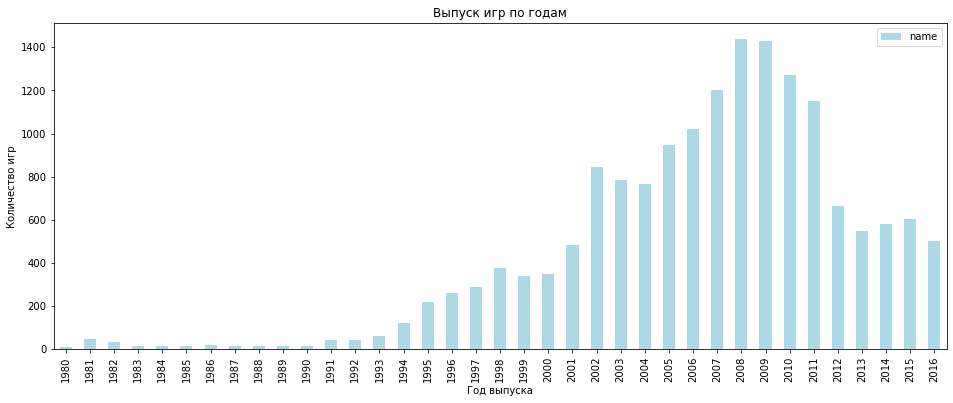

In [19]:
PrintBar(games_dataset, 'year_of_release', 'name', 'count', \
         'Выпуск игр по годам', 'Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?',0, 'Год выпуска', 'Количество игр') 

Так как с 1980 по 1990 количество игр увеличивалось незначительно, можно считать данный период хвостом, пик выхода игр пришелся на 2007 - 2011 годы, чуть позже можно будет разбить периоды на категории (подъем, пик, спад) и рассмотреть рейтинги игр, вышедших в эти периоды.
Спад можно объяснить развитием ПК и появлением смартфонов

**Как распределились игры по платформам?**

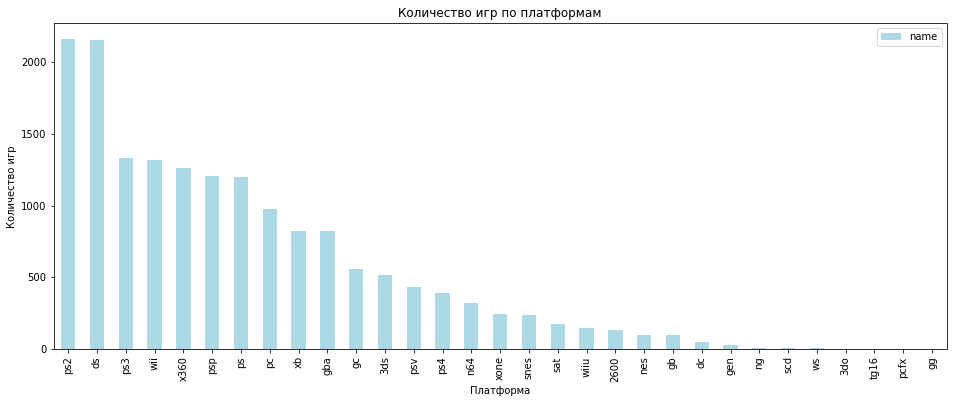

****

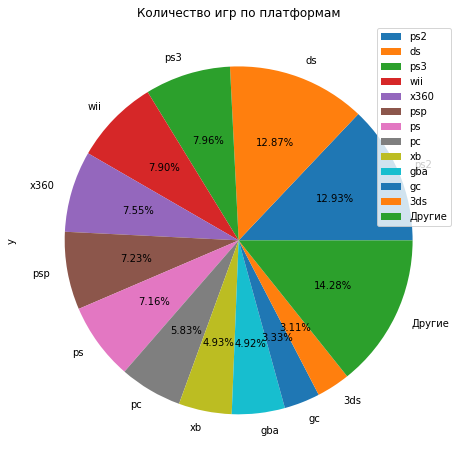

In [20]:
PrintBar(games_dataset, 'platform', 'name', 'count', 'Количество игр по платформам', 'Как распределились игры по платформам?',1, 'Платформа', 'Количество игр')
PrintPie(games_dataset, 'platform', 'name', 'count', 'Количество игр по платформам', '', 12)

Лидеров продаж интереснее рассматривать в разбивке по типам приставок - посмотрим отдельно для домашних и портативных приставок

In [21]:
games_suppl_dataset = pd.merge(games_dataset, platform_dataset,  
                      how='left', left_on=['platform'], right_on = ['platform'])

Посмотрим, как распределились продажи по типам приставок

****

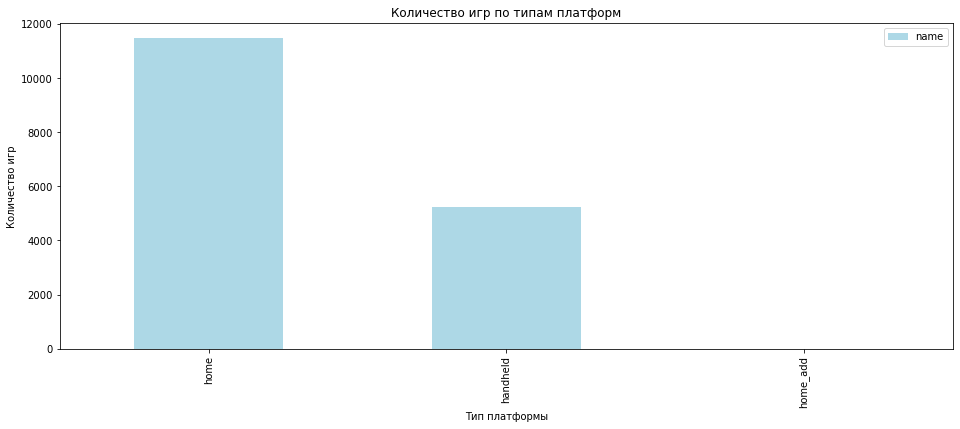

****

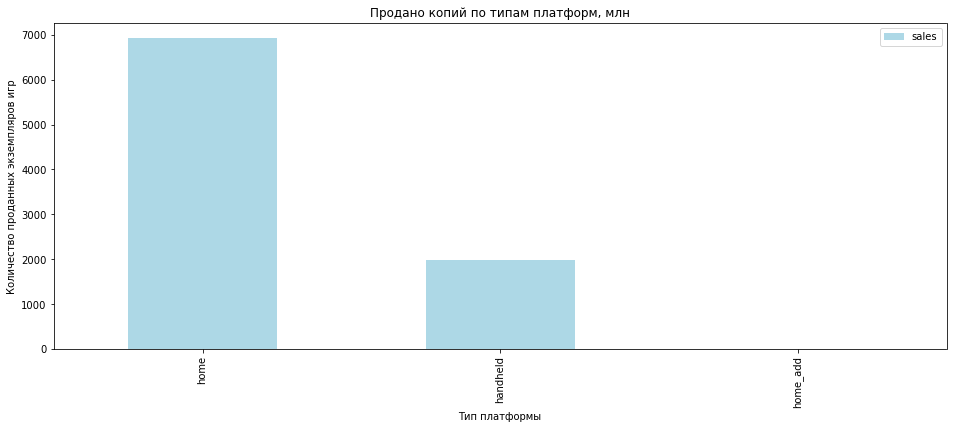

In [22]:
PrintBar(games_suppl_dataset, 'type', 'name', 'count', 'Количество игр по типам платформ', \
         '', 1, 'Тип платформы', 'Количество игр')
#PrintPie(games_suppl_dataset, 'type', 'name', 'count', 'Количество игр по типам платформ', '', 3)
PrintBar(games_suppl_dataset, 'type', 'sales', 'sum', 'Продано копий по типам платформ, млн', \
         '', 1, 'Тип платформы', 'Количество проданных экземпляров игр')
#PrintPie(games_suppl_dataset, 'type', 'sales', 'sum', 'Продано копий по типам платформ', '', 3)

Для домашних приставок выпускают в 2 раза больше игр! А продается экземпляров в 3 раза больше.

### Посмотрим на выпуски и продажи игр для домашних приставок 

****

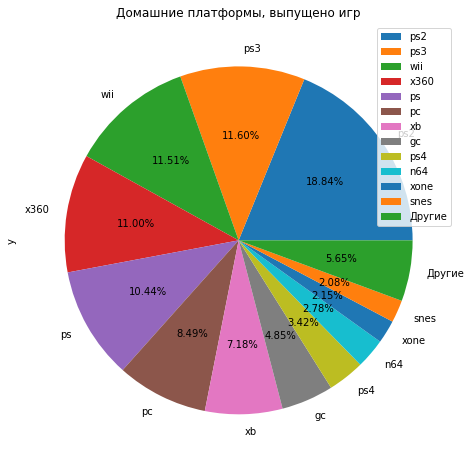

****

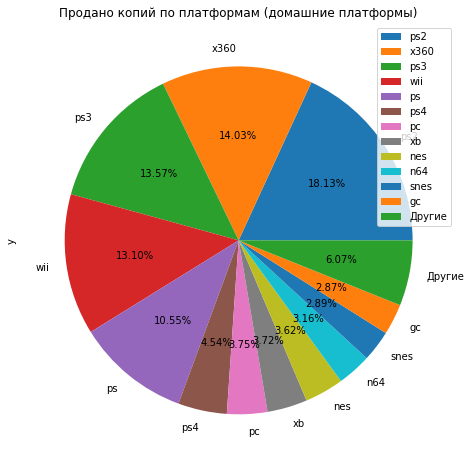

In [23]:
#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], 'platform', \
#         'name', 'count', 'Домашние платформы, выпущено игр', '', 1, 'Домашние платформы', 'Количество игр')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], \
         'platform', 'name', 'count', 'Домашние платформы, выпущено игр', '', 12)

#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], \
#         'platform', 'sales', 'sum', 'Продано копий по платформам, млн', '', 1, \
#         'Домашние платформы', 'Продано копий')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], \
         'platform', 'sales', 'sum', 'Продано копий по платформам (домашние платформы)', '', 12)

Видно, что большую долю занимают приставки из семейства ps. Может стоит взглянуть и на данные в разресе семейств приставок?

****

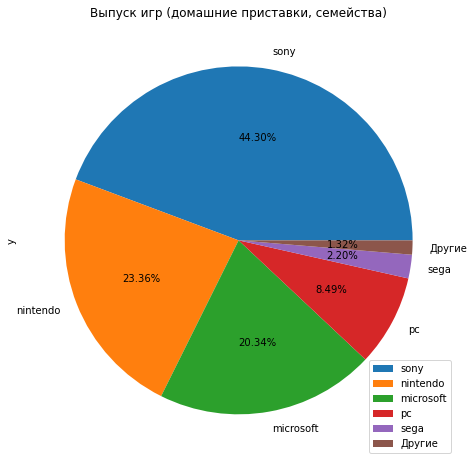

****

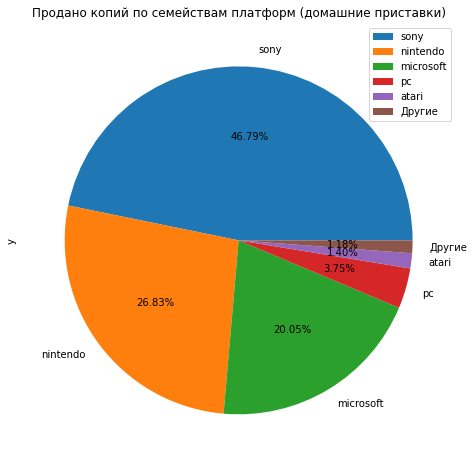

In [24]:
#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], \
#         'family', 'name', 'count', 'Выпуск игр (домашние приставки, семейства)', '', 1, 'Семейства платформ', 'Количество игр')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'home'], \
         'family', 'name', 'count', 'Выпуск игр (домашние приставки, семейства)', '', 5)

#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'home'],\
#         'family', 'sales', 'sum','Продано копий по семействам платформ (домашние приставки), млн', '',\
#         1, 'Семейства платформ', 'Продано копий')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'home'],\
         'family', 'sales', 'sum', 'Продано копий по семействам платформ (домашние приставки)', '', 5)

Есть три гиганта на рынке - sony, nintendo, microsoft.

Рассмотрим, как по годам менялись продажи для семейств и их приставок по годам

In [25]:
def setTickerLines(ax_array, ax_titles):
    for i in range(0, len(ax_array)):
        ax_array[i].set_title(ax_titles[i])
    
        ax_array[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
        ax_array[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax_array[i].yaxis.set_major_locator(ticker.MultipleLocator(50))
        ax_array[i].yaxis.set_minor_locator(ticker.MultipleLocator(10))
    
        ax_array[i].grid(which='major',
            color = 'k')
        ax_array[i].minorticks_on()
        ax_array[i].grid(which='minor',
            color = 'gray',
            linestyle = ':')

**sony**

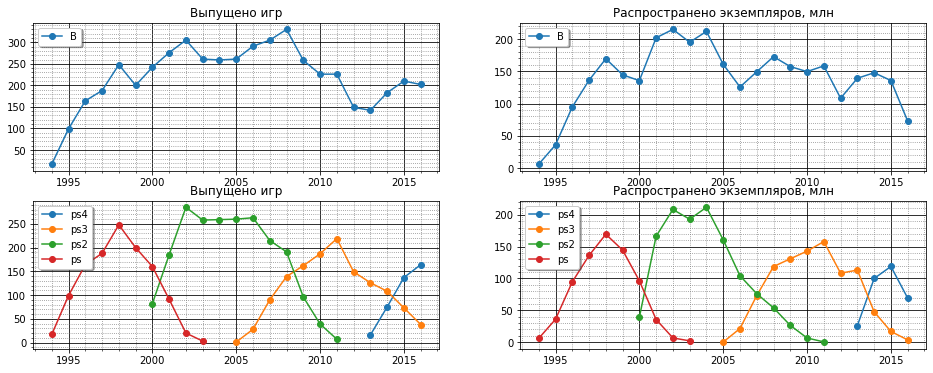

**nintendo**

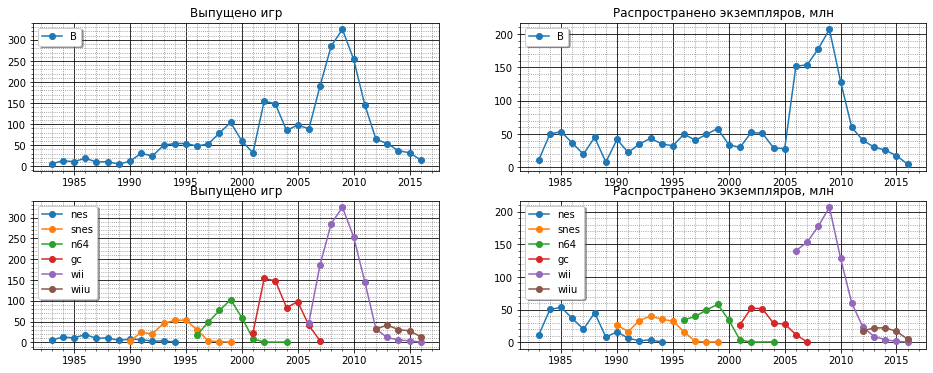

**microsoft**

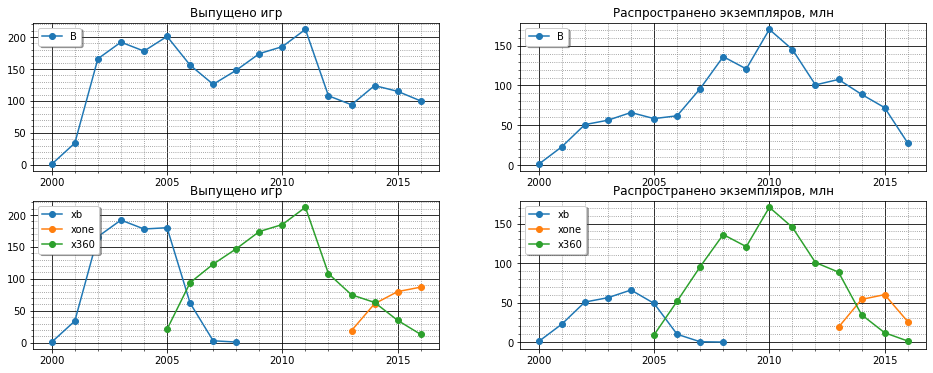

In [26]:
for family in ['sony','nintendo','microsoft']:
    printmd("**" + family + "**")
    test_data = games_suppl_dataset[(games_suppl_dataset['type'] == 'home')&\
                                          (games_suppl_dataset['family'] == family)]\
        .groupby(['year_of_release','platform']).agg({'name':['count'],'sales':['sum']}).reset_index()
    
    test_data.columns = ['year_of_release', 'platform', 'x', 'y']
    test_data_gp = test_data.groupby('year_of_release').agg({'x':['sum'],'y':['sum']}).reset_index()
    test_data_gp.columns = ['year_of_release', 'x', 'y']
    
    f, axs = plt.subplots(2, 2, figsize=(16,6))

    ax1 = axs[1][0]
    ax2 = axs[1][1]
    ax3 = axs[0][0]
    ax4 = axs[0][1]
    if family == 'sony':
        axl1, axl2, axl3, axl4 = ax1.plot(test_data[test_data['platform'] == 'ps4']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps4']['x'], 'o-', 
             test_data[test_data['platform'] == 'ps3']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps3']['x'], 'o-', 
             test_data[test_data['platform'] == 'ps2']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps2']['x'], 'o-', 
             test_data[test_data['platform'] == 'ps']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps']['x'], 'o-')
    
        ax21, ax22, ax23, ax24 = ax2.plot(test_data[test_data['platform'] == 'ps4']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps4']['y'], 'o-',
             test_data[test_data['platform'] == 'ps3']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps3']['y'], 'o-',
             test_data[test_data['platform'] == 'ps2']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps2']['y'], 'o-',
             test_data[test_data['platform'] == 'ps']['year_of_release'], 
                                                test_data[test_data['platform'] == 'ps']['y'], 'o-'
                                               )
        
        ax31 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-')
        ax41 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-')
        
        ax1.legend((axl1, axl2, axl3, axl4), ('ps4', 'ps3', 'ps2', 'ps'), loc='upper left', shadow=True)
        ax2.legend((ax21, ax22, ax23, ax24), ('ps4', 'ps3', 'ps2', 'ps'), loc='upper left', shadow=True)
        ax3.legend((ax31), ('Все'), loc='upper left', shadow=True)
        ax4.legend((ax41), ('Все'), loc='upper left', shadow=True)
        
    if family == 'nintendo':
        axl1, axl2, axl3, axl4, axl5, axl6 = ax1.plot(test_data[test_data['platform'] == 'nes']['year_of_release'],
                                                test_data[test_data['platform'] == 'nes']['x'], 'o-', 
             test_data[test_data['platform'] == 'snes']['year_of_release'], 
                                                test_data[test_data['platform'] == 'snes']['x'], 'o-', 
             test_data[test_data['platform'] == 'n64']['year_of_release'], 
                                                test_data[test_data['platform'] == 'n64']['x'], 'o-', 
             test_data[test_data['platform'] == 'gc']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gc']['x'], 'o-',
             test_data[test_data['platform'] == 'wii']['year_of_release'], 
                                                test_data[test_data['platform'] == 'wii']['x'], 'o-',
             test_data[test_data['platform'] == 'wiiu']['year_of_release'], 
                                                test_data[test_data['platform'] == 'wiiu']['x'], 'o-')
    
        ax21, ax22, ax23, ax24, ax25, ax26 = ax2.plot(test_data[test_data['platform'] == 'nes']['year_of_release'],
                                                test_data[test_data['platform'] == 'nes']['y'], 'o-', 
             test_data[test_data['platform'] == 'snes']['year_of_release'], 
                                                test_data[test_data['platform'] == 'snes']['y'], 'o-', 
             test_data[test_data['platform'] == 'n64']['year_of_release'], 
                                                test_data[test_data['platform'] == 'n64']['y'], 'o-', 
             test_data[test_data['platform'] == 'gc']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gc']['y'], 'o-',
             test_data[test_data['platform'] == 'wii']['year_of_release'], 
                                                test_data[test_data['platform'] == 'wii']['y'], 'o-',
             test_data[test_data['platform'] == 'wiiu']['year_of_release'], 
                                                test_data[test_data['platform'] == 'wiiu']['y'], 'o-')
        
        ax31 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-')
        ax41 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-')
        
        ax3.legend((ax31), ('Все'), loc='upper left', shadow=True)
        ax4.legend((ax41), ('Все'), loc='upper left', shadow=True)
        ax1.legend((axl1, axl2, axl3, axl4, axl5, axl6), ('nes', 'snes', 'n64', 'gc', 'wii', 'wiiu'), loc='upper left', shadow=True)
        ax2.legend((ax21, ax22, ax23, ax24, ax25, ax26), ('nes', 'snes', 'n64', 'gc', 'wii', 'wiiu'), loc='upper left', shadow=True)
    
    if family == 'microsoft':
        axl1, axl2, axl3 = ax1.plot(test_data[test_data['platform'] == 'xb']['year_of_release'], \
                                                test_data[test_data['platform'] == 'xb']['x'], 'o-', \
             test_data[test_data['platform'] == 'xone']['year_of_release'], \
                                                test_data[test_data['platform'] == 'xone']['x'], 'o-', \
             test_data[test_data['platform'] == 'x360']['year_of_release'], \
                                                test_data[test_data['platform'] == 'x360']['x'], 'o-')
    
        ax21, ax22, ax23 = ax2.plot(test_data[test_data['platform'] == 'xb']['year_of_release'], 
                                                test_data[test_data['platform'] == 'xb']['y'], 'o-',
             test_data[test_data['platform'] == 'xone']['year_of_release'], 
                                                test_data[test_data['platform'] == 'xone']['y'], 'o-',
             test_data[test_data['platform'] == 'x360']['year_of_release'], 
                                                test_data[test_data['platform'] == 'x360']['y'], 'o-')
        ax31 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-')
        ax41 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-')
        
        ax3.legend((ax31), ('Все'), loc='upper left', shadow=True)
        ax4.legend((ax41), ('Все'), loc='upper left', shadow=True)
        ax1.legend((axl1, axl2, axl3), ('xb', 'xone', 'x360'), loc='upper left', shadow=True)
        ax2.legend((ax21, ax22, ax23), ('xb', 'xone', 'x360'), loc='upper left', shadow=True)
    
    
    setTickerLines([ax1,ax2,ax3, ax4],['Выпущено игр','Распространено экземпляров, млн','Выпущено игр','Распространено экземпляров, млн'])

    plt.show()  

Можно обратить внимание на то, что один из гигантов хорошо взлетел в период с 2000 по 2010, но на текущий момент его приставки не актуальны - nintendo.

Sony же развавается в области, позиций не сдает.

Microsoft тоже развивается, но не так популярен, что относительно sony, что относительно себя в 2000 - 2010. 

В среднем платформы появляются и исчезают за 8-11 лет

Посмотрим еще один срез - по поколениям приставок.

**Поколения платформ**

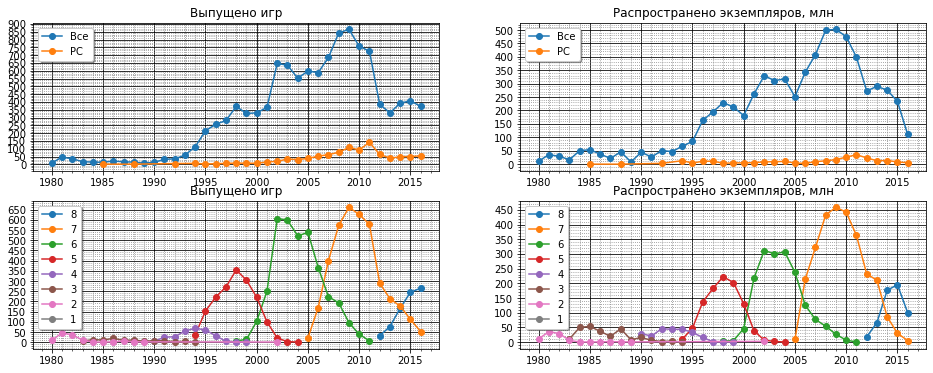

In [27]:
printmd("**Поколения платформ**")
test_data = games_suppl_dataset[(games_suppl_dataset['type'] == 'home')]\
        .groupby(['year_of_release','generation']).agg({'name':['count'],'sales':['sum']}).reset_index()
    
test_data.columns = ['year_of_release', 'generation', 'x', 'y']
test_data_gp = test_data.groupby('year_of_release').agg({'x':['sum'],'y':['sum']}).reset_index()
test_data_gp.columns = ['year_of_release', 'x', 'y']
    
f, axs = plt.subplots(2, 2, figsize=(16,6))

ax1 = axs[1][0]
ax2 = axs[1][1]
ax3 = axs[0][0]
ax4 = axs[0][1]

axl1, axl2, axl3, axl4,axl5, axl6, axl7, axl8 = ax1.plot(test_data[test_data['generation'] == 8]['year_of_release'], 
                                                test_data[test_data['generation'] == 8]['x'], 'o-', 
             test_data[test_data['generation'] == 7]['year_of_release'], 
                                                test_data[test_data['generation'] == 7]['x'], 'o-', 
             test_data[test_data['generation'] == 6]['year_of_release'], 
                                                test_data[test_data['generation'] == 6]['x'], 'o-', 
             test_data[test_data['generation'] == 5]['year_of_release'], 
                                                test_data[test_data['generation'] == 5]['x'], 'o-', 
             test_data[test_data['generation'] == 4]['year_of_release'], 
                                                test_data[test_data['generation'] == 4]['x'], 'o-', 
             test_data[test_data['generation'] == 3]['year_of_release'], 
                                                test_data[test_data['generation'] == 3]['x'], 'o-', 
             test_data[test_data['generation'] == 2]['year_of_release'], 
                                                test_data[test_data['generation'] == 2]['x'], 'o-', 
             test_data[test_data['generation'] == 1]['year_of_release'], 
                                                test_data[test_data['generation'] == 1]['x'], 'o-')
    
ax21, ax22, ax23, ax24,ax25, ax26, ax27, ax28 = ax2.plot(test_data[test_data['generation'] == 8]['year_of_release'], 
                                                test_data[test_data['generation'] == 8]['y'], 'o-',
             test_data[test_data['generation'] == 7]['year_of_release'], 
                                                test_data[test_data['generation'] == 7]['y'], 'o-',
             test_data[test_data['generation'] == 6]['year_of_release'], 
                                                test_data[test_data['generation'] == 6]['y'], 'o-',
             test_data[test_data['generation'] == 5]['year_of_release'], 
                                                test_data[test_data['generation'] == 5]['y'], 'o-',
             test_data[test_data['generation'] == 4]['year_of_release'], 
                                                test_data[test_data['generation'] == 4]['y'], 'o-',
             test_data[test_data['generation'] == 3]['year_of_release'], 
                                                test_data[test_data['generation'] == 3]['y'], 'o-',
             test_data[test_data['generation'] == 2]['year_of_release'], 
                                                test_data[test_data['generation'] == 2]['y'], 'o-',
             test_data[test_data['generation'] == 1]['year_of_release'], 
                                                test_data[test_data['generation'] == 1]['y'], 'o-'
                                               )
ax31, ax32 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-', 
             test_data[test_data['generation'] == 99]['year_of_release'], 
                                                test_data[test_data['generation'] == 99]['x'], 'o-')
ax41, ax42 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-',
             test_data[test_data['generation'] == 99]['year_of_release'], 
                                                test_data[test_data['generation'] == 99]['y'], 'o-')
ax1.legend((axl1, axl2, axl3, axl4,axl5, axl6, axl7, axl8), ('8', '7', '6', '5','4','3','2','1','PC'), loc='upper left', shadow=True)
ax2.legend((ax21, ax22, ax23, ax24,ax25, ax26, ax27, ax28), ('8', '7', '6', '5','4','3','2','1','PC'), loc='upper left', shadow=True)
ax3.legend((ax31, ax32), ('Все','PC'), loc='upper left', shadow=True)
ax4.legend((ax41, ax42), ('Все','PC'), loc='upper left', shadow=True)

setTickerLines([ax1,ax2,ax3, ax4],['Выпущено игр','Распространено экземпляров, млн','Выпущено игр','Распространено экземпляров, млн'])

plt.show()  

В актуальный период времени интересны перекаты по поколениям: чуть позже пика популярности одного поколения появляется платформа нового поколения, при этом предыдущее поколение только-только потеряло интерес пользователей

### Посмотрим аналогичную аналитику для портативных приставок

****

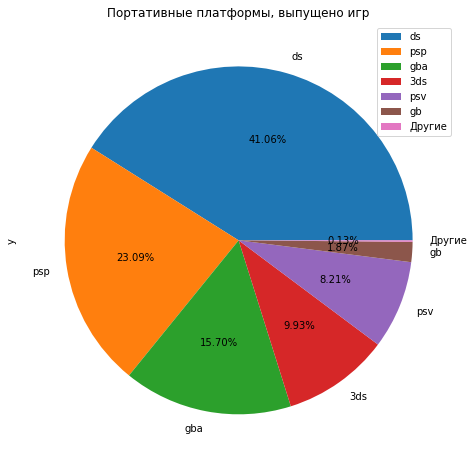

****

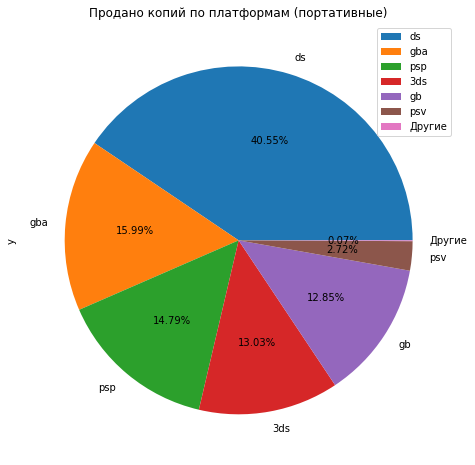

In [28]:
#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
#         'platform', 'name', 'count', 'Портативные платформы, выпущено игр', '',\
#         1, 'Портативные платформы', 'Выпущено игр')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
         'platform', 'name', 'count', 'Портативные платформы, выпущено игр', '', 6)

#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'], \
#         'platform', 'sales', 'sum', 'Продано копий по платформам (портативные), млн', '',\
#         1, 'Портативные платформы', 'Продано экземпляров')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
         'platform', 'sales', 'sum', 'Продано копий по платформам (портативные)', '', 6)

Можно выделить лидеров - ds,psp,gba

****

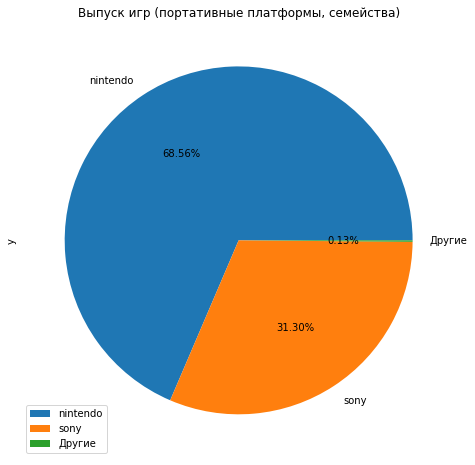

****

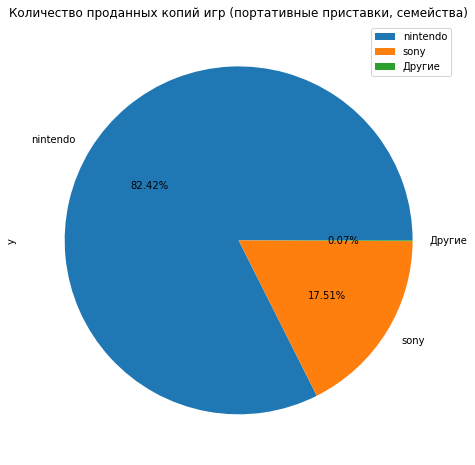

In [29]:
#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
#         'family', 'name', 'count', 'Выпуск игр (портативные платформы, семейства)', ''\
#        , 1, 'Портативные платформы', 'Выпущено игр')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
         'family', 'name', 'count', 'Выпуск игр (портативные платформы, семейства)', '',2)

#PrintBar(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'],\
#         'family', 'sales', 'sum', 'Количество проданных копий игр (портативные приставки, семейства), млн', ''\
#        , 1, 'Портативные платформы', 'Выпущено игр')
PrintPie(games_suppl_dataset[games_suppl_dataset['type'] == 'handheld'], \
         'family', 'sales', 'sum', 'Количество проданных копий игр (портативные приставки, семейства)', '',2)

Лидеры неизменны, что у домашних приставок, что у портативных - nintendo и sony

**sony**

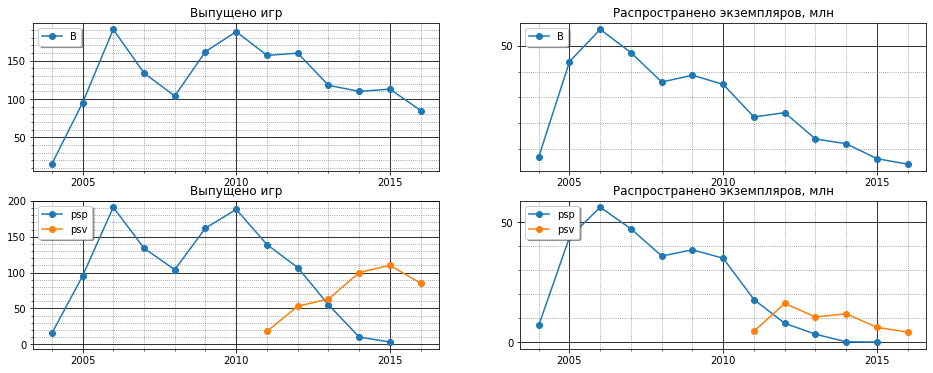

**nintendo**

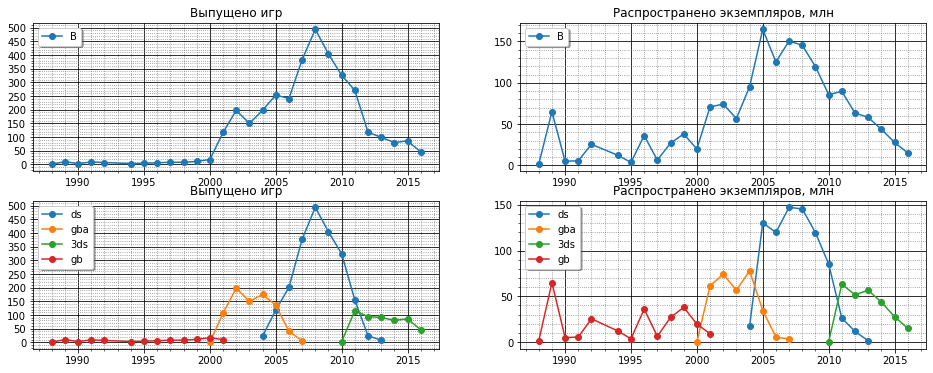

In [30]:
for family in ['sony','nintendo']:
    printmd("**" + family + "**")
    test_data = games_suppl_dataset[(games_suppl_dataset['type'] == 'handheld')&\
                                          (games_suppl_dataset['family'] == family)]\
        .groupby(['year_of_release','platform']).agg({'name':['count'],'sales':['sum']}).reset_index()
    
    test_data.columns = ['year_of_release', 'platform', 'x', 'y']
    test_data_gp = test_data.groupby('year_of_release').agg({'x':['sum'],'y':['sum']}).reset_index()
    test_data_gp.columns = ['year_of_release', 'x', 'y']
    f, axs = plt.subplots(2, 2, figsize=(16,6))

    ax1 = axs[1][0]
    ax2 = axs[1][1]
    ax3 = axs[0][0]
    ax4 = axs[0][1]
    if family == 'sony':
        axl1, axl2 = ax1.plot(test_data[test_data['platform'] == 'psp']['year_of_release'], 
                                                test_data[test_data['platform'] == 'psp']['x'], 'o-', 
             test_data[test_data['platform'] == 'psv']['year_of_release'], 
                                                test_data[test_data['platform'] == 'psv']['x'], 'o-')
    
        ax21, ax22 = ax2.plot(test_data[test_data['platform'] == 'psp']['year_of_release'], 
                                                test_data[test_data['platform'] == 'psp']['y'], 'o-',
             test_data[test_data['platform'] == 'psv']['year_of_release'], 
                                                test_data[test_data['platform'] == 'psv']['y'], 'o-'
                                               )
        
        ax31 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-')
        ax41 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-')
        
        ax1.legend((axl1, axl2), ('psp', 'psv'), loc='upper left', shadow=True)
        ax2.legend((ax21, ax22), ('psp', 'psv'), loc='upper left', shadow=True)
        ax3.legend((ax31), ('Все'), loc='upper left', shadow=True)
        ax4.legend((ax41), ('Все'), loc='upper left', shadow=True)
        
    if family == 'nintendo':
        axl1, axl2, axl3, axl4 = ax1.plot(test_data[test_data['platform'] == 'ds']['year_of_release'],
                                                test_data[test_data['platform'] == 'ds']['x'], 'o-', 
             test_data[test_data['platform'] == 'gba']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gba']['x'], 'o-', 
             test_data[test_data['platform'] == '3ds']['year_of_release'], 
                                                test_data[test_data['platform'] == '3ds']['x'], 'o-', 
             test_data[test_data['platform'] == 'gb']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gb']['x'], 'o-')
    
        ax21, ax22, ax23, ax24 = ax2.plot(test_data[test_data['platform'] == 'ds']['year_of_release'],
                                                test_data[test_data['platform'] == 'ds']['y'], 'o-', 
             test_data[test_data['platform'] == 'gba']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gba']['y'], 'o-', 
             test_data[test_data['platform'] == '3ds']['year_of_release'], 
                                                test_data[test_data['platform'] == '3ds']['y'], 'o-', 
             test_data[test_data['platform'] == 'gb']['year_of_release'], 
                                                test_data[test_data['platform'] == 'gb']['y'], 'o-')
        
        ax31 = ax3.plot(test_data_gp['year_of_release'], test_data_gp['x'], 'o-')
        ax41 = ax4.plot(test_data_gp['year_of_release'], test_data_gp['y'], 'o-')
        
        ax3.legend((ax31), ('Все'), loc='upper left', shadow=True)
        ax4.legend((ax41), ('Все'), loc='upper left', shadow=True)
        ax1.legend((axl1, axl2, axl3, axl4), ('ds', 'gba', '3ds', 'gb'), loc='upper left', shadow=True)
        ax2.legend((ax21, ax22, ax23, ax24), ('ds', 'gba', '3ds', 'gb'), loc='upper left', shadow=True)
    
    setTickerLines([ax1,ax2,ax3, ax4],['Выпущено игр','Распространено экземпляров, млн','Выпущено игр','Распространено экземпляров, млн'])

    plt.show()  

Портативные платформы активно вытесняются смартфонами, интерес пользователей падает.

Интересно, что есть игры на ds, выпущенные в 1985г - в данные закралась ошибка. По хорошему в таблицу платформ необходимо добавить год появления платформы, чтобы отбросить игры, у которых год выхода игры явно не соответствует году выхода платформы.

Посмотрим, что это за игры

In [31]:
display(games_dataset[(games_dataset['platform'] == 'ds')&(games_dataset['year_of_release'] < 2000)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_cat,sales


Так как игра всего одна, то вернемся в предобработку и удалим ее

###  Посмотрим данные за актуальный период для домашних приставок

Стоит обратить внимание на то, что в целом интерес к играм падает

Выделим два промежутка, которые будем рассматривать:
* 2013-2015 - так как период актуальный и показывает текущие тенденции, 2016 отбрасываем, так как за этот год данные не полные
* 2006-2011 - так как в то время был аналогичный период - смена поколений приставок

Выделим их в отдельные датасеты

In [32]:
home_games_dataset_aktual = games_suppl_dataset[#(games_suppl_dataset['type'] == 'home')&\
                            (games_suppl_dataset['year_of_release'] > 2012)&\
                                         (games_suppl_dataset['year_of_release'] < 2016)]
                                         
home_games_dataset_similar = games_suppl_dataset[#(games_suppl_dataset['type'] == 'home')&\
                            (games_suppl_dataset['year_of_release'] > 2005)&\
                                         (games_suppl_dataset['year_of_release'] < 2012)]

Рассмотрим данные в разрезах:\
    * популярность платформ/семейств в регионах, в целом\
    * влияние оценок критиков/пользователей на популярность платформ/семейств в регионах, в целом\
    * влияние рейтинга игр на полулярность платформ/семейств в регионах, в целом\
    * распределение игр по жанрам, влияние на популярность

In [33]:
def PrintPopulationPlot(data, columnx1, columnsx, columny, columnsy, sort_column, agg_func, title):
    printmd("**"+title+"**")
    
    gp_data = data.groupby(columnx1)[columnsy]\
        .agg(agg_func,).sort_values(by=sort_column, ascending=False).reset_index()
    gp_data.columns = [columnx1, agg_func]
    
    gp_data2 = data.groupby(columnx1)[columnsy]\
        .agg('var').sort_values(by=sort_column, ascending=False).reset_index()
    gp_data2.columns = [columnx1, 'var']
    
    data_desc = data.groupby(columnx1)[columnsy].describe().reset_index()
    data_desc.columns = [columnx1,'count','mean','std','min','25%','50%','75%','max']
    
    gp_data = gp_data.merge(data_desc, on = columnx1, how='left')    
    gp_data = gp_data.merge(gp_data2, on = columnx1, how='left')    
    
    display(gp_data)
            
    sns.boxplot(data=data, x=columnx1, y=columny)
    plt.title("Ящик с усами")
    plt.show()
    
    #data.groupby(columnx1)[columnsy]\
    #    .agg(agg_func).plot(y=columnsy, kind='bar')
    #plt.title(title)
    #plt.legend()
    #plt.show()
    
    for i in list(data[columnx1].unique()):
        data[data[columnx1] == i].groupby(columnsx[0])[columny]\
        .agg(agg_func)\
        .plot(y=columnsy, kind='line', label=i, style='.-')
    
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    plt.show()

In [34]:
#PrintPopulationPlot(home_games_dataset_similar, 'platform', ['year_of_release','platform'],\
#              'sales', ['sales'\
#                        #,'na_sales','eu_sales','jp_sales','other_sales'\
#                       ],\
#              'sales','sum','Количество проданных экземпляров по платформам за 2006-2011')

#PrintPopulationPlot(home_games_dataset_similar, 'family', ['year_of_release','family'],\
#              'sales', ['sales','na_sales','eu_sales','jp_sales','other_sales'],\
#              'sales','sum','Количество проданных экземпляров по семействам за 2006-2011')



**Количество распространенных экземпляров по платформам за 2013-2015**

,platform,sum,count,mean,std,min,25%,50%,75%,max,var
0,ps4,244.89,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63,3.609195
1,ps3,177.83,307.0,0.579251,1.530432,0.01,0.0500,0.190,0.5600,21.05,2.342223
2,x360,135.28,173.0,0.781965,1.715684,0.01,0.0900,0.290,0.8900,16.27,2.943573
3,xone,133.17,160.0,0.832312,1.182243,0.01,0.1300,0.350,1.1375,7.39,1.397698
4,3ds,128.11,257.0,0.498482,1.431660,0.01,0.0400,0.100,0.2900,14.60,2.049651
5,wiiu,60.03,101.0,0.594356,1.098038,0.01,0.0600,0.200,0.6000,7.09,1.205687
6,pc,34.81,138.0,0.252246,0.395771,0.01,0.0300,0.100,0.2875,3.05,0.156635
7,psv,28.74,273.0,0.105275,0.171310,0.01,0.0200,0.050,0.1200,1.96,0.029347
8,wii,13.48,22.0,0.612727,0.932412,0.01,0.0425,0.165,0.8525,3.58,0.869392
9,psp,3.74,68.0,0.055000,0.063540,0.01,0.0175,0.020,0.0800,0.24,0.004037


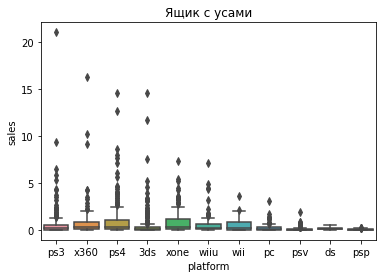

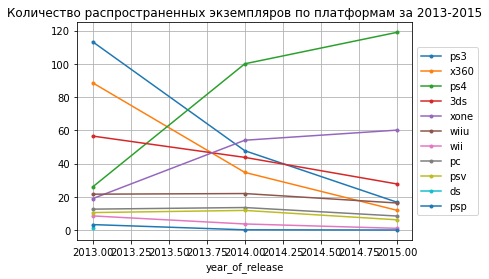

**Приблизим ящик**

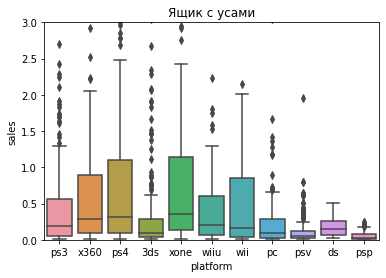

**Количество распространенных экземпляров по семействам за 2013-2015**

,family,sum,count,mean,std,min,25%,50%,75%,max,var
0,sony,455.20,876.0,0.519635,1.384400,0.01,0.03,0.11,0.4000,21.05,1.916564
1,microsoft,268.45,333.0,0.806156,1.481553,0.01,0.10,0.32,0.9100,16.27,2.194998
2,nintendo,203.16,388.0,0.523608,1.311314,0.01,0.04,0.11,0.4125,14.60,1.719544
3,pc,34.81,138.0,0.252246,0.395771,0.01,0.03,0.10,0.2875,3.05,0.156635


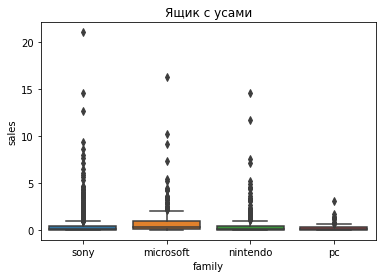

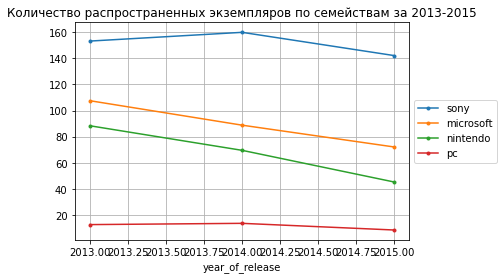

**Приблизим ящик**

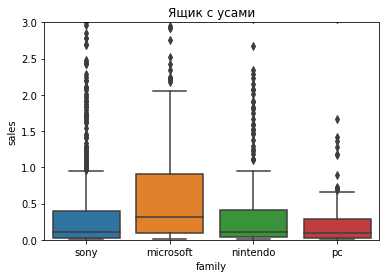

In [35]:
PrintPopulationPlot(home_games_dataset_aktual, 'platform', ['year_of_release','platform'],\
              'sales', ['sales'\
                        #,'na_sales','eu_sales','jp_sales','other_sales'\
                       ],\
              'sales','sum','Количество распространенных экземпляров по платформам за 2013-2015')

printmd("**Приблизим ящик**")
sns.boxplot(data=home_games_dataset_aktual, x='platform', y='sales')
plt.title("Ящик с усами")
plt.ylim([0,3])
plt.show()

PrintPopulationPlot(home_games_dataset_aktual, 'family', ['year_of_release','family'],\
              'sales', ['sales'\
                        #,'na_sales','eu_sales','jp_sales','other_sales'\
                       ],\
              'sales','sum','Количество распространенных экземпляров по семействам за 2013-2015')

printmd("**Приблизим ящик**")
sns.boxplot(data=home_games_dataset_aktual, x='family', y='sales')
plt.title("Ящик с усами")
plt.ylim([0,3])
plt.show()

На диаграмме размаха стоит выделить ps4 и xone - у них широкий межквартильный интервал, медиана выше, чем у других платформ, при этом количество распространенных интервалов нарастает от 2013 к 2016. Даже если в ближайшие годы платформы начнут терять интерес пользователей, маловероятно, что он упадет полностью. 

Рассмотрим оценки пользователей и зависимость между оценками и распространением

**Оценки критиков для ирг, выпущенных в 2013-2015**

,platform,median,count,mean,std,min,25%,50%,75%,max,var
0,pc,76.0,107.0,75.514019,10.075530,33.0,71.0,76.0,82.0,96.0,101.516311
1,xone,76.0,109.0,73.045872,13.560827,20.0,66.0,76.0,82.0,97.0,183.896024
2,ps4,74.0,154.0,72.357143,12.621529,19.0,66.0,74.0,81.0,97.0,159.302988
3,psp,74.0,1.0,74.000000,NaN,74.0,74.0,74.0,74.0,74.0,NaN
4,x360,74.0,81.0,69.234568,15.513922,19.0,60.0,74.0,80.0,97.0,240.681790
5,ps3,73.0,121.0,70.198347,14.329236,13.0,63.0,73.0,80.0,97.0,205.326997
6,wiiu,73.0,61.0,71.491803,14.259059,32.0,66.0,73.0,82.0,93.0,203.320765
7,psv,71.0,67.0,71.238806,8.978239,43.0,66.0,71.0,77.0,87.0,80.608774
8,3ds,69.0,61.0,67.754098,13.783632,26.0,60.0,69.0,79.0,91.0,189.988525
9,ds,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


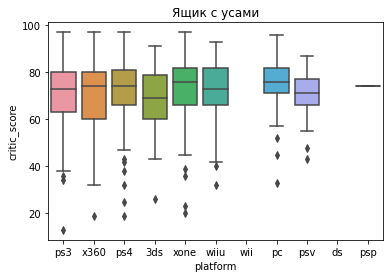

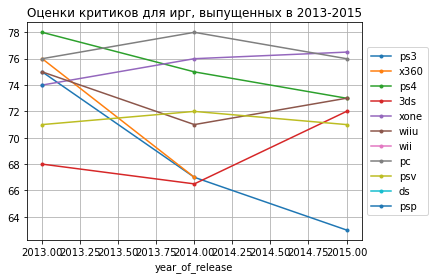

**Оценки пользователей для ирг, выпущенных в 2013-2015**

,platform,median,count,mean,std,min,25%,50%,75%,max,var
0,psv,7.75,86.0,7.489535,1.397648,1.8,7.300,7.75,8.375,9.3,1.953419
1,3ds,7.30,68.0,6.907353,1.614146,2.4,6.175,7.30,8.200,9.0,2.605468
2,wiiu,7.30,71.0,6.985915,1.434304,2.8,6.250,7.30,8.000,9.1,2.057227
3,ps3,7.00,177.0,6.446893,1.708403,1.0,5.300,7.00,7.800,9.1,2.918641
4,ps4,6.95,156.0,6.666667,1.449242,1.5,6.100,6.95,7.700,9.2,2.100301
5,pc,6.70,113.0,6.273451,1.740793,1.4,5.400,6.70,7.600,9.3,3.030360
6,xone,6.70,116.0,6.477586,1.288213,2.1,5.775,6.70,7.300,9.2,1.659493
7,x360,6.30,136.0,6.086765,1.518908,1.3,5.100,6.30,7.300,8.7,2.307083
8,psp,5.85,2.0,5.850000,3.464823,3.4,4.625,5.85,7.075,8.3,12.005000
9,ds,4.80,1.0,4.800000,NaN,4.8,4.800,4.80,4.800,4.8,NaN


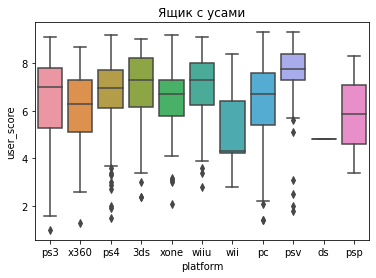

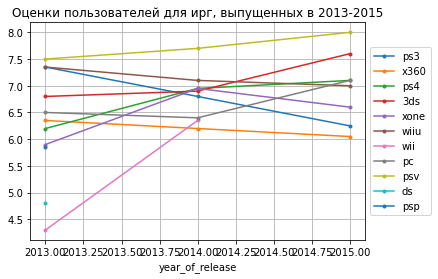

Посмотрим, как оценки критиков и пользователей влияют на распространение игр

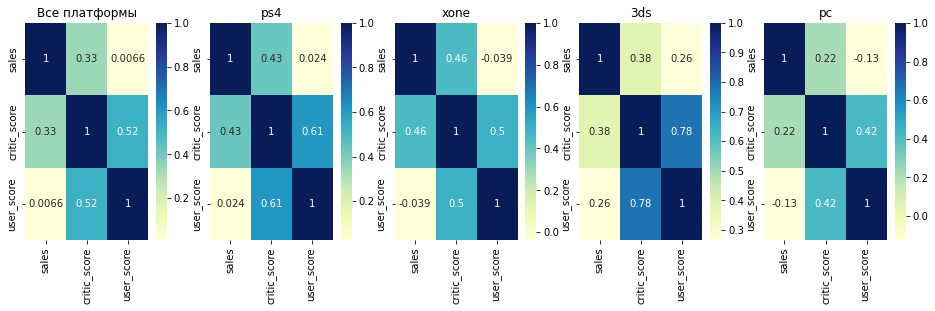

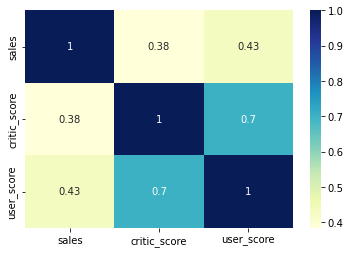

In [36]:
PrintPopulationPlot(home_games_dataset_aktual, 'platform', ['year_of_release','platform','generation'],\
              'critic_score', ['critic_score'],\
              'critic_score','median','Оценки критиков для ирг, выпущенных в 2013-2015')
 
PrintPopulationPlot(home_games_dataset_aktual, 'platform', ['year_of_release','platform','generation'],\
              'user_score', ['user_score'],\
              'user_score','median','Оценки пользователей для ирг, выпущенных в 2013-2015')

printmd("Посмотрим, как оценки критиков и пользователей влияют на распространение игр")

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(16,4))

g1 = sns.heatmap(home_games_dataset_aktual[['sales','critic_score','user_score']].corr(),
                 cmap="YlGnBu",annot=True,ax=ax1)
g2 = sns.heatmap(home_games_dataset_aktual.query("platform == 'ps4'")[['sales','critic_score','user_score']].corr(),
                 annot=True,cmap="YlGnBu",ax=ax2)
g3 = sns.heatmap(home_games_dataset_aktual.query("platform == 'xone'")[['sales','critic_score','user_score']].corr(),
                 annot=True,cmap="YlGnBu",ax=ax3)
g4 = sns.heatmap(home_games_dataset_aktual.query("platform == '3ds'")[['sales','critic_score','user_score']].corr(),
                 annot=True,cmap="YlGnBu",ax=ax4)
g5 = sns.heatmap(home_games_dataset_aktual.query("platform == 'pc'")[['sales','critic_score','user_score']].corr(),
                 annot=True,cmap="YlGnBu",ax=ax5)

ax1.set_title('Все платформы')
ax2.set_title('ps4')
ax3.set_title('xone')
ax4.set_title('3ds')
ax5.set_title('pc')
plt.show()

sns.heatmap(home_games_dataset_aktual.query("platform == 'wiiu'")[['sales','critic_score','user_score']].corr(),
                 annot=True,cmap="YlGnBu")
plt.show()

**Оценки критиков для ирг, выпущенных в 2013-2015**

,family,median,count,mean,std,min,25%,50%,75%,max,var
0,pc,76.0,107.0,75.514019,10.075530,33.0,71.0,76.0,82.00,96.0,101.516311
1,microsoft,75.0,190.0,71.421053,14.509679,19.0,64.0,75.0,81.00,97.0,210.530771
2,sony,73.0,343.0,71.381924,12.641823,13.0,65.0,73.0,80.00,97.0,159.815696
3,nintendo,71.0,122.0,69.622951,14.090808,26.0,62.0,71.0,80.75,93.0,198.550874


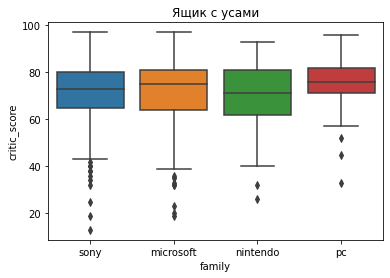

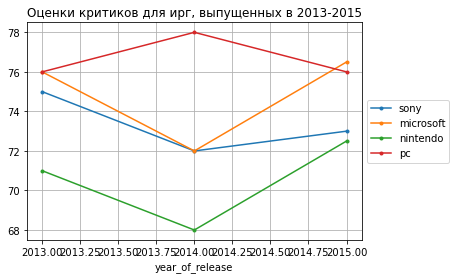

**Оценки пользователей для ирг, выпущенных в 2013-2015**

,family,median,count,mean,std,min,25%,50%,75%,max,var
0,sony,7.20,421.0,6.738480,1.605954,1.0,6.0,7.20,7.9,9.3,2.579087
1,nintendo,7.10,147.0,6.852381,1.578161,2.4,6.1,7.10,8.1,9.1,2.490594
2,pc,6.70,113.0,6.273451,1.740793,1.4,5.4,6.70,7.6,9.3,3.030360
3,microsoft,6.45,252.0,6.266667,1.428035,1.3,5.4,6.45,7.3,9.2,2.039283


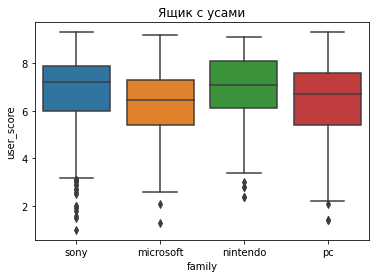

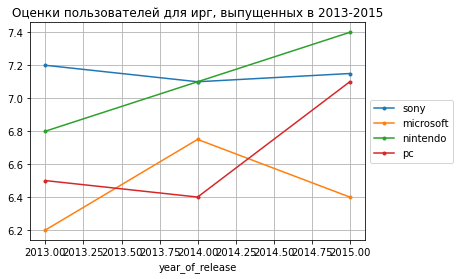

Посмотрим, как оценки критиков и пользователей влияют на распространение игр

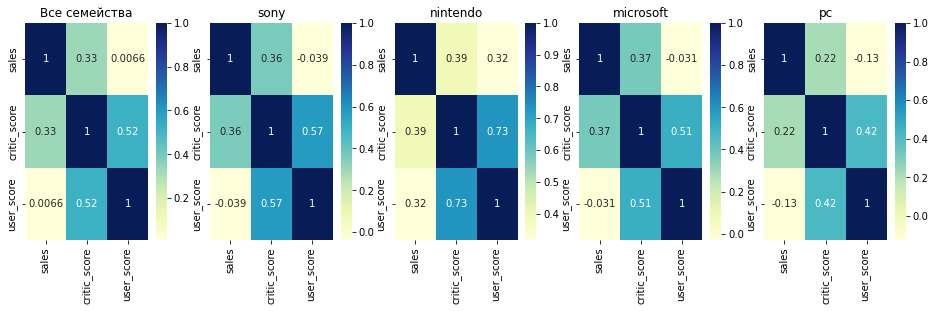

In [37]:
PrintPopulationPlot(home_games_dataset_aktual, 'family', ['year_of_release','platform','generation'],\
              'critic_score', ['critic_score'],\
              'critic_score','median','Оценки критиков для ирг, выпущенных в 2013-2015')

PrintPopulationPlot(home_games_dataset_aktual, 'family', ['year_of_release','platform','generation'],\
              'user_score', ['user_score'],\
              'user_score','median','Оценки пользователей для ирг, выпущенных в 2013-2015')

printmd("Посмотрим, как оценки критиков и пользователей влияют на распространение игр")

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(16,4))

g1 = sns.heatmap(home_games_dataset_aktual[['sales','critic_score','user_score']].corr(),cmap="YlGnBu",
                 annot=True,ax=ax1)
g2 = sns.heatmap(home_games_dataset_aktual.query("family == 'sony'")[['sales','critic_score','user_score']].corr(),
                 cmap="YlGnBu",annot=True,ax=ax2)
g3 = sns.heatmap(home_games_dataset_aktual.query("family == 'nintendo'")[['sales','critic_score','user_score']].corr(),
                 cmap="YlGnBu",annot=True,ax=ax3)
g4 = sns.heatmap(home_games_dataset_aktual.query("family == 'microsoft'")[['sales','critic_score','user_score']].corr(),
                 cmap="YlGnBu",annot=True,ax=ax4)
g5 = sns.heatmap(home_games_dataset_aktual.query("family == 'pc'")[['sales','critic_score','user_score']].corr(),
                 cmap="YlGnBu",annot=True,ax=ax5)

ax1.set_title('Все семейства')
ax2.set_title('sony')
ax3.set_title('nintendo')
ax4.set_title('microsoft')
ax5.set_title('pc')
plt.show()

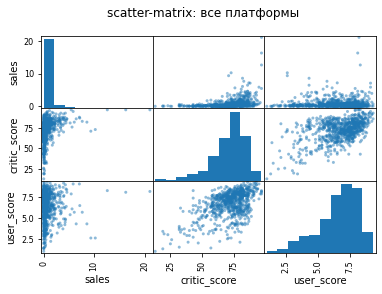

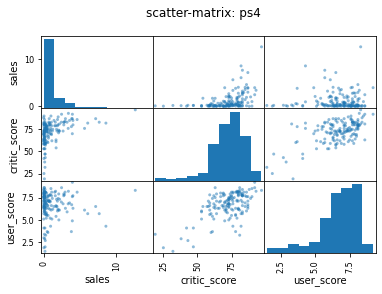

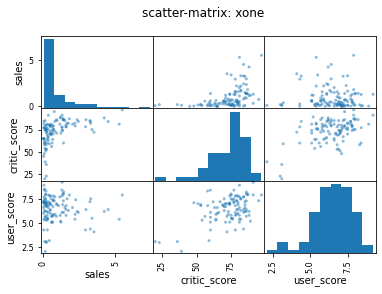

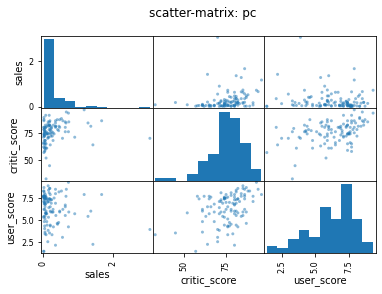

In [38]:
pd.plotting.scatter_matrix(home_games_dataset_aktual[['sales', 'critic_score','user_score']])
plt.suptitle('scatter-matrix: все платформы')
plt.show()
pd.plotting.scatter_matrix(home_games_dataset_aktual.query("platform == 'ps4'")[['sales','critic_score','user_score']])
plt.suptitle('scatter-matrix: ps4')
plt.show()
pd.plotting.scatter_matrix(home_games_dataset_aktual.query("platform == 'xone'")[['sales','critic_score','user_score']])
plt.suptitle('scatter-matrix: xone')
plt.show()
pd.plotting.scatter_matrix(home_games_dataset_aktual.query("platform == 'pc'")[['sales','critic_score','user_score']])
plt.suptitle('scatter-matrix: pc')
plt.show()

**Оценки критиков**

Самые высокии оценки критики ставят играм для PC, XONE и PS4. Среди игр для портативных платформ - PSP.

Оценки игр для домашних платформ более разнооброазные, чем у игр для PC. При этом для pc и ps4 наблюдается незначительная тенденция вниз - оценки незначительно падают, для xone наоборот - незначительно растут.

Оценки критиков в целом оказывают высокое влияние на распространение игр. Но есть платформы, где влияние более сильное - 3ds.

**Оценки пользователей** 

Оценки пользователей имеют более широкий размах, чем оценки критиков. Среди домашних приставок пользователи ставят высокие оценки играм для платформы wiiu, однако это умеренно влияет на количество распространенных экземпляров. Так же высокие оценки получают игры для платформ ps4 и xone среди домашних, 3ds и psv среди портативных. Можно обратить внимание на то, что пользователи psv более единодушны в оценках. 

В целом, оценки пользователей слабо влияют на распространение игр.


Так же можно обратить внимание, что как у критиков, так и у пользователей высокие оценки для игр на ПК, а оценки игр, вышедших для теряющих популярность платформ, падают с каждым годом

# Cамые популярные жанры

,Жанр,Выпущено игр,"Распространено экземпляров, млн"
0,action,591,292.39
8,shooter,140,194.76
7,role-playing,238,127.71
10,sports,166,127.16
3,misc,124,60.46
4,platform,59,39.40
6,racing,61,37.10
2,fighting,64,30.84
9,simulation,44,19.87
1,adventure,189,19.82


****

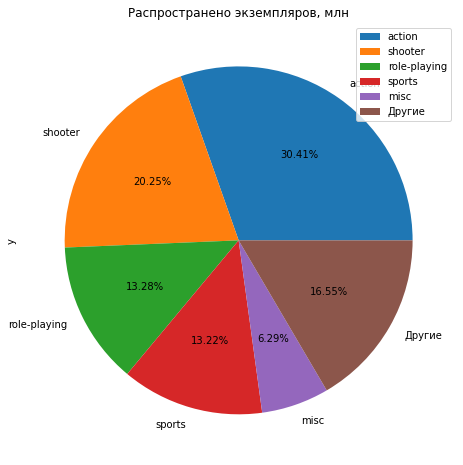

****

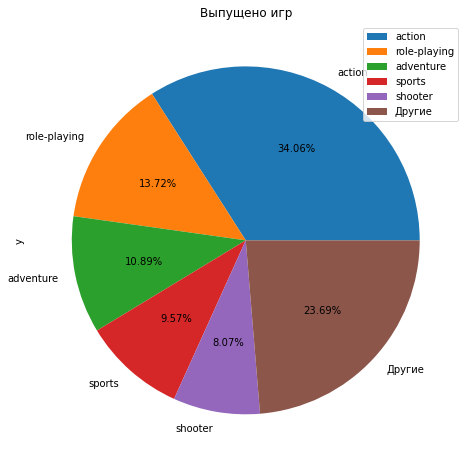

In [39]:
ganres_stat = home_games_dataset_aktual.groupby('genre').agg({'name':['count'],'sales':['sum']}).reset_index()
ganres_stat.columns = ['Жанр','Выпущено игр','Распространено экземпляров, млн']
display(ganres_stat.sort_values(by = 'Распространено экземпляров, млн', ascending = False))

PrintPie(home_games_dataset_aktual,\
         'genre', 'sales', 'sum', 'Распространено экземпляров, млн', '',5)
PrintPie(home_games_dataset_aktual,\
         'genre', 'sales', 'count', 'Выпущено игр', '',5)

In [40]:
genres_top5 = list(ganres_stat.sort_values(by = 'Распространено экземпляров, млн', ascending = False)['Жанр'].head())

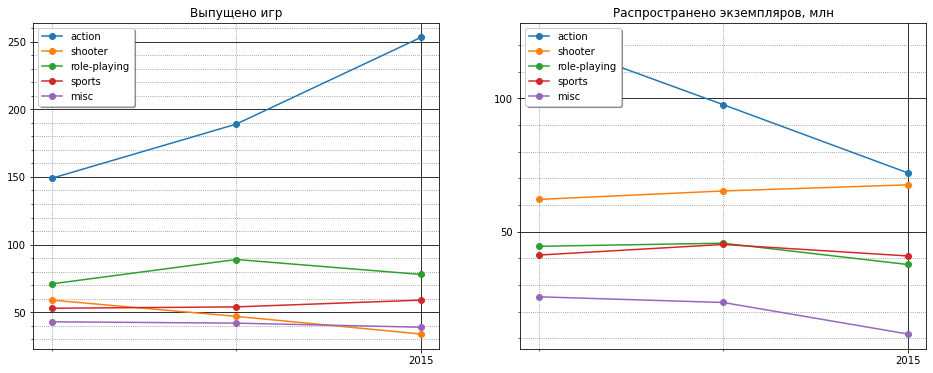

In [41]:
test_data = home_games_dataset_aktual.groupby(['year_of_release','genre'])\
    .agg({'name':['count'],'sales':['sum']}).reset_index()
    
test_data.columns = ['year_of_release', 'genre', 'count', 'sum']
test_data_gp = test_data.groupby('year_of_release').agg({'count':['sum'],'sum':['sum']}).reset_index()
test_data_gp.columns = ['year_of_release', 'count', 'sum']


f, axs = plt.subplots(1, 2, figsize=(16,6))

#ax1, ax2 = axs

ax00, ax01, ax02, ax03, ax04 = axs[0].plot(test_data[test_data['genre'] == genres_top5[0]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[0]]['count'], 'o-',
                        test_data[test_data['genre'] == genres_top5[1]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[1]]['count'], 'o-',
                        test_data[test_data['genre'] == genres_top5[2]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[2]]['count'], 'o-',
                        test_data[test_data['genre'] == genres_top5[3]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[3]]['count'], 'o-',
                        test_data[test_data['genre'] == genres_top5[4]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[4]]['count'], 'o-')

ax10, ax11, ax12, ax13, ax14 = axs[1].plot(test_data[test_data['genre'] == genres_top5[0]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[0]]['sum'], 'o-',
                        test_data[test_data['genre'] == genres_top5[1]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[1]]['sum'], 'o-',
                        test_data[test_data['genre'] == genres_top5[2]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[2]]['sum'], 'o-',
                        test_data[test_data['genre'] == genres_top5[3]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[3]]['sum'], 'o-',
                        test_data[test_data['genre'] == genres_top5[4]]['year_of_release'], 
                                                test_data[test_data['genre'] == genres_top5[4]]['sum'], 'o-')
 

axs[0].legend((ax00, ax01, ax02, ax03, ax04), (genres_top5), loc='upper left', shadow=True)
axs[1].legend((ax10, ax11, ax12, ax13, ax14), (genres_top5), loc='upper left', shadow=True)

setTickerLines([axs[0],axs[1]],['Выпущено игр','Распространено экземпляров, млн'])

plt.show()  

Самые популярные жанры - action и shooter. Обратив внимание на то, что количество игр в жанре action растет, при этом количество распространенных экземпляров падает.У жанра shooter количество выпускаемых игр падает, а количество распространенных экхземпляров растет - стоит к нему присмотреться.  

Также отметим, что пользователи не очень интересуются жанрами strategy, puzzle.

#  Портрет пользователя в зависимости от региона

**Портрет пользователя из Северной Америки**

,platform,na_sales
0,ps4,87.25
1,x360,80.97
2,xone,78.85
3,ps3,62.83
4,3ds,34.06
5,wiiu,27.11
6,pc,9.83
7,wii,6.50
8,psv,4.89
9,ds,0.57


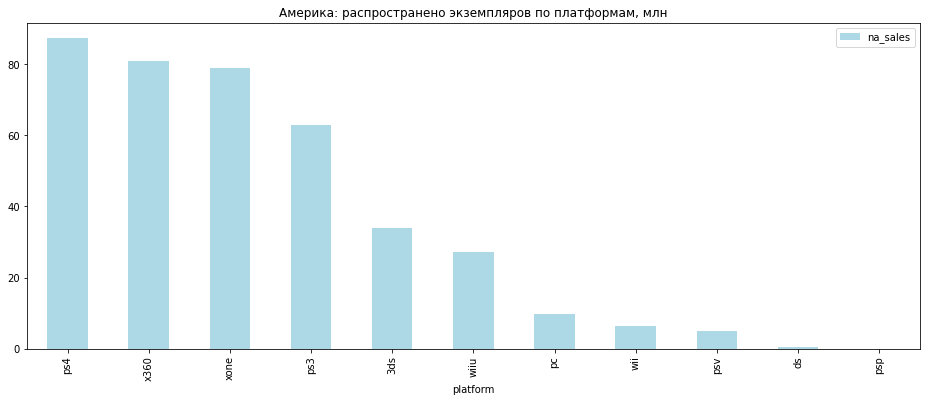

,family,na_sales
0,microsoft,159.82
1,sony,154.97
2,nintendo,68.24
3,pc,9.83


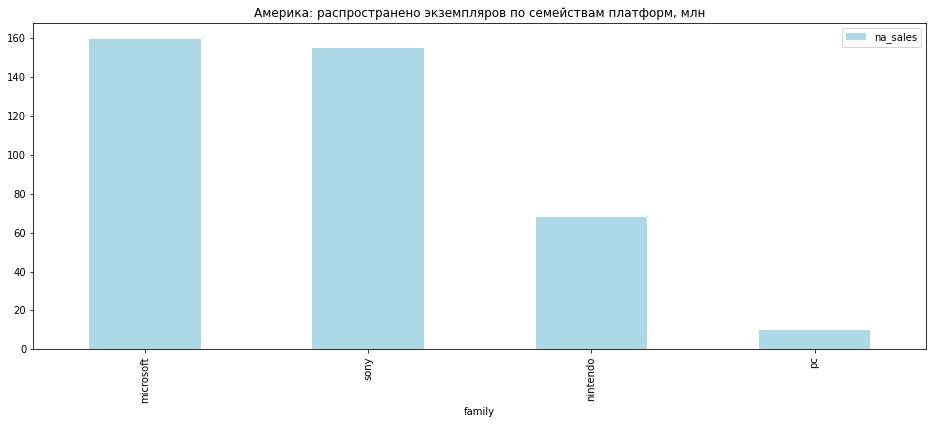

,genre,na_sales
0,action,116.84
1,shooter,93.50
2,sports,57.73
3,role-playing,40.51
4,misc,26.73
5,platform,16.85
6,fighting,13.71
7,racing,12.23
8,adventure,6.19
9,simulation,4.70


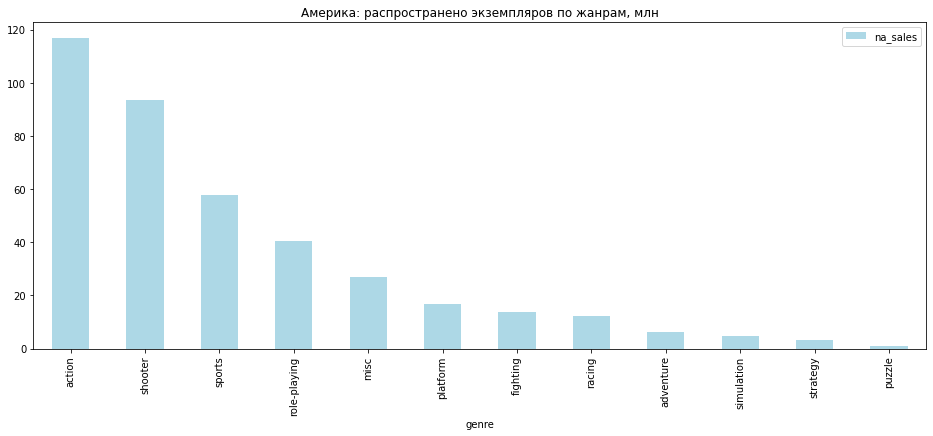

,rating,na_sales
0,M,149.62
1,Не определен,80.89
2,E,71.08
3,E10+,50.43
4,T,40.84


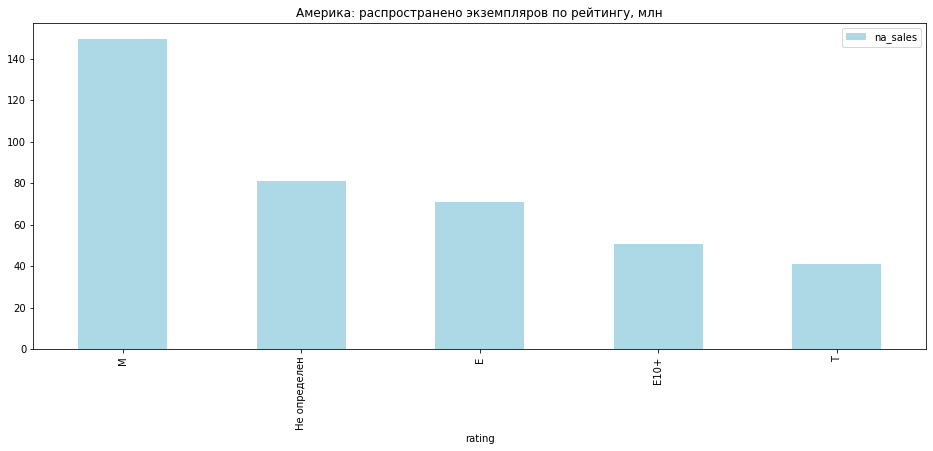

**Портрет пользователя из Европы**

,platform,eu_sales
0,ps4,109.31
1,ps3,66.55
2,xone,41.96
3,x360,41.81
4,3ds,28.63
5,pc,22.31
6,wiiu,18.37
7,wii,5.82
8,psv,5.71
9,ds,0.85


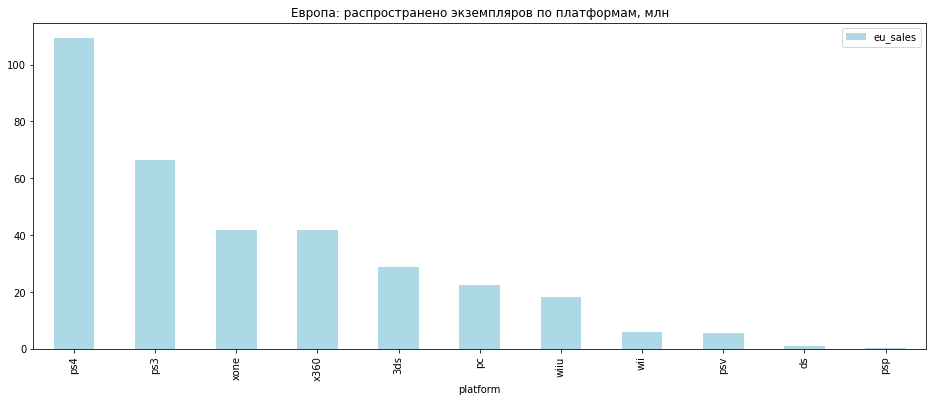

,family,eu_sales
0,sony,181.74
1,microsoft,83.77
2,nintendo,53.67
3,pc,22.31


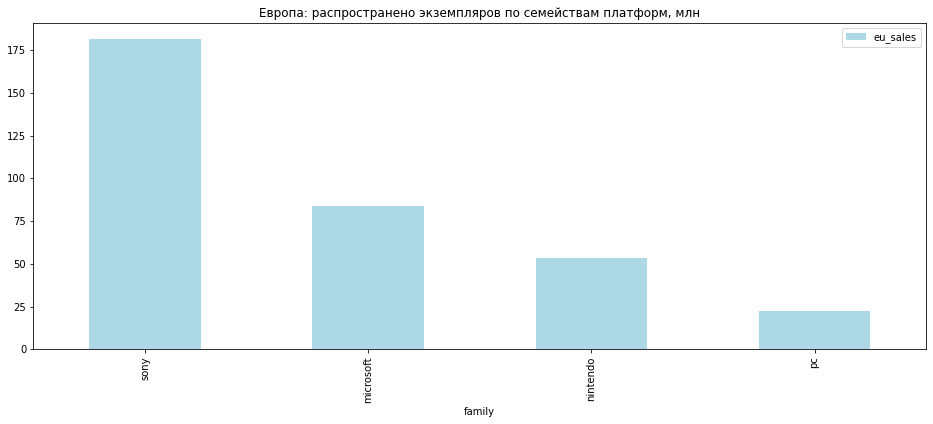

,genre,eu_sales
0,action,107.93
1,shooter,71.96
2,sports,48.51
3,role-playing,32.69
4,misc,19.38
5,racing,18.42
6,platform,14.19
7,simulation,9.65
8,fighting,7.21
9,adventure,6.93


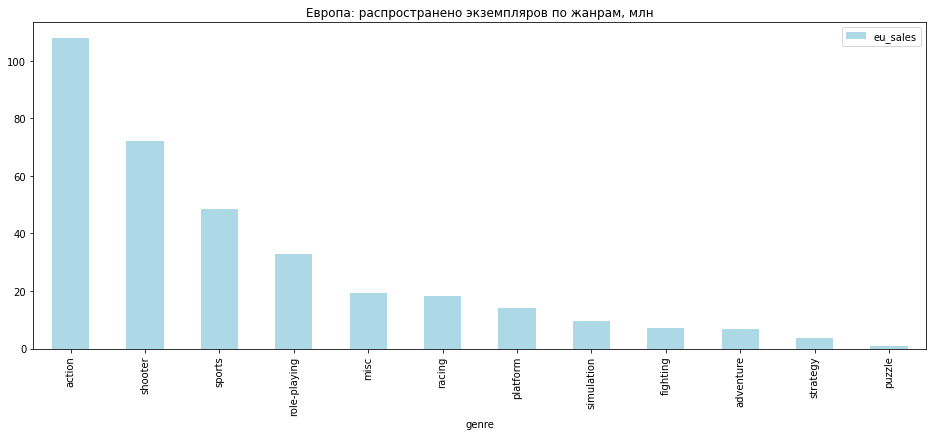

,rating,eu_sales
0,M,129.26
1,Не определен,71.44
2,E,69.75
3,E10+,38.88
4,T,32.16


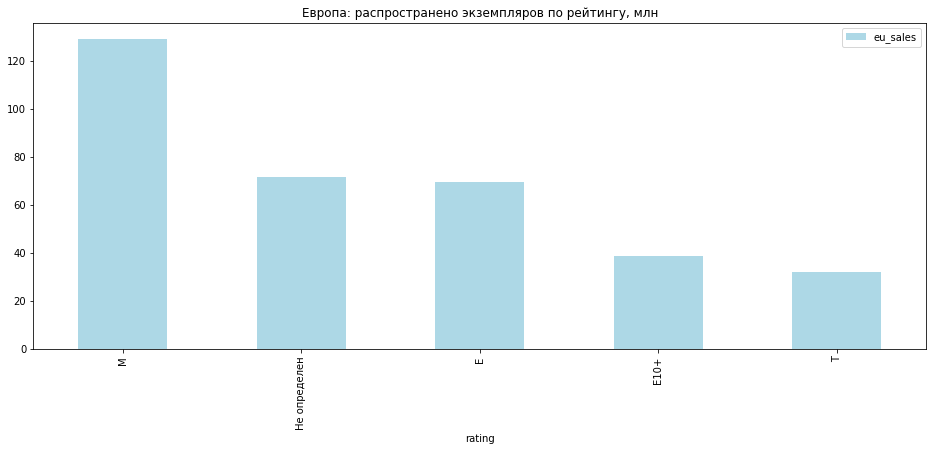

**Портрет пользователя из Японии**

,platform,jp_sales
0,3ds,59.78
1,ps3,22.05
2,psv,15.03
3,ps4,10.22
4,wiiu,10.21
5,psp,3.53
6,x360,0.51
7,xone,0.33
8,wii,0.05
9,ds,0.00


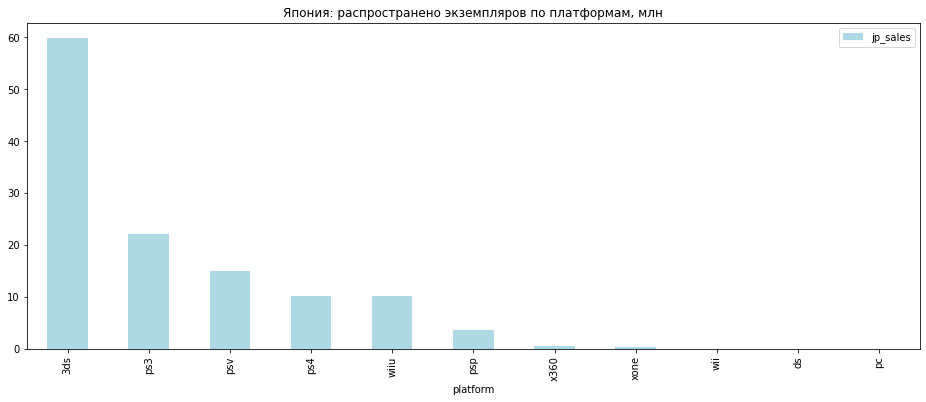

,family,jp_sales
0,nintendo,70.04
1,sony,50.83
2,microsoft,0.84
3,pc,0.00


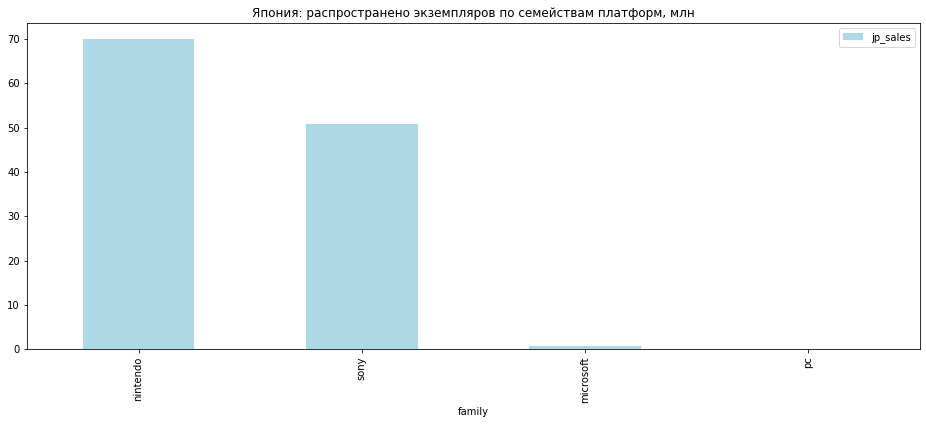

,genre,jp_sales
0,role-playing,44.43
1,action,33.42
2,misc,8.40
3,fighting,6.90
4,shooter,5.55
5,platform,4.68
6,adventure,4.64
7,sports,4.49
8,simulation,4.19
9,racing,2.29


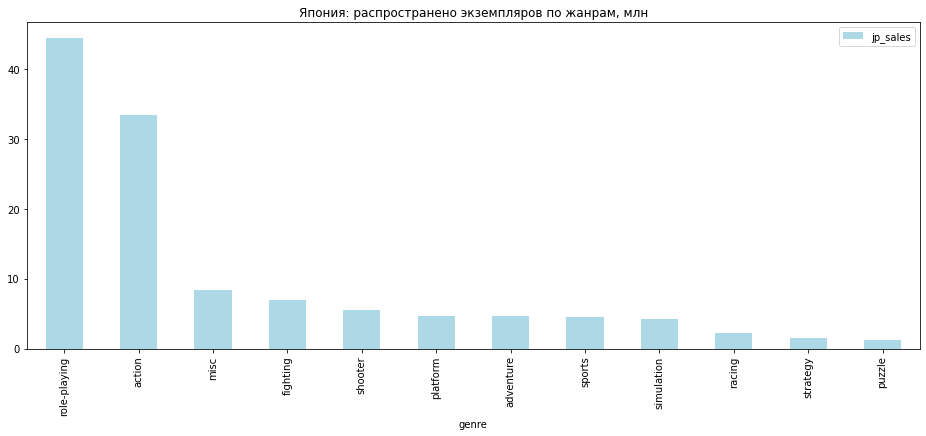

,rating,jp_sales
0,Не определен,70.97
1,T,18.32
2,E,14.07
3,M,12.91
4,E10+,5.44


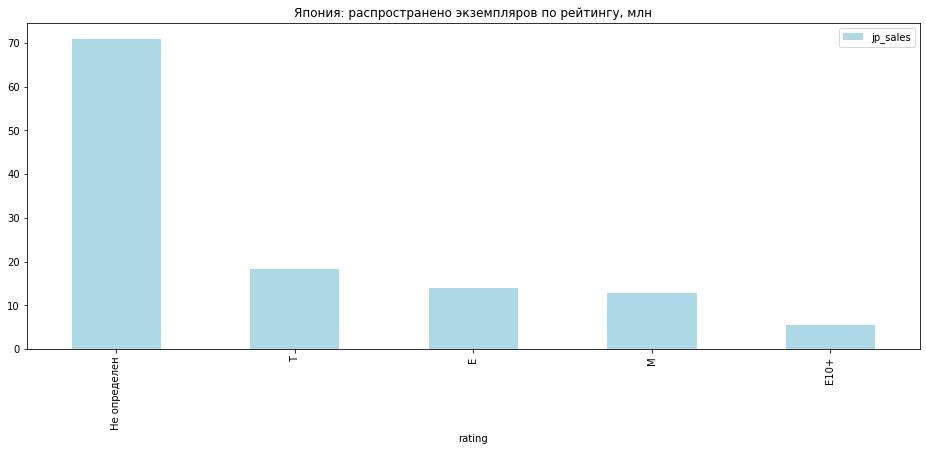

**Портрет пользователя из других регионов**

,platform,other_sales
0,ps4,38.11
1,ps3,26.40
2,xone,12.03
3,x360,11.99
4,3ds,5.64
5,wiiu,4.34
6,psv,3.11
7,pc,2.67
8,wii,1.11
9,ds,0.12


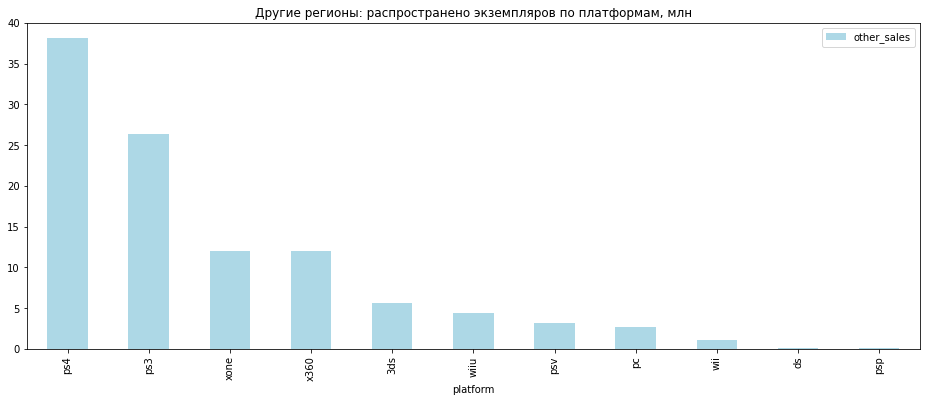

,family,other_sales
0,sony,67.66
1,microsoft,24.02
2,nintendo,11.21
3,pc,2.67


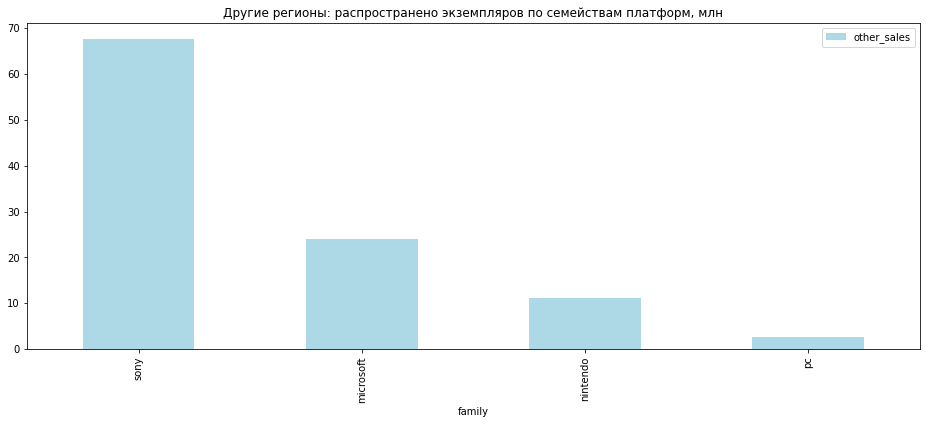

,genre,other_sales
0,action,34.20
1,shooter,23.75
2,sports,16.43
3,role-playing,10.08
4,misc,5.95
5,racing,4.16
6,platform,3.68
7,fighting,3.02
8,adventure,2.06
9,simulation,1.33


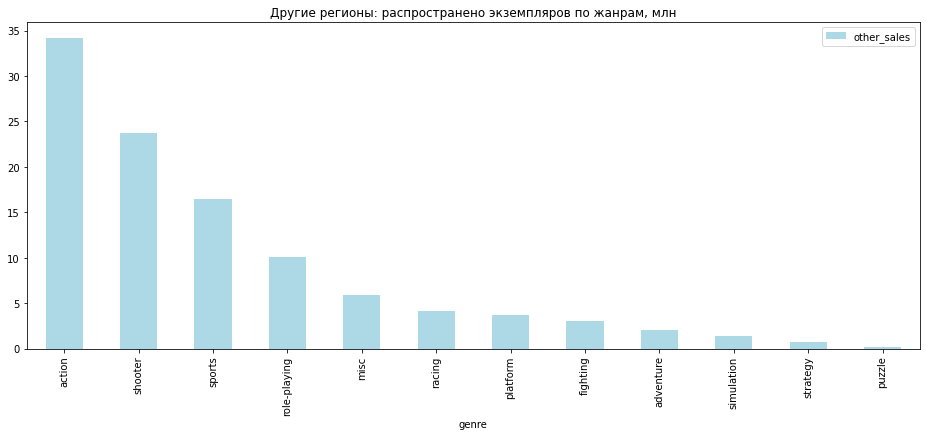

,rating,other_sales
0,M,42.17
1,Не определен,21.18
2,E,19.52
3,E10+,11.51
4,T,11.18


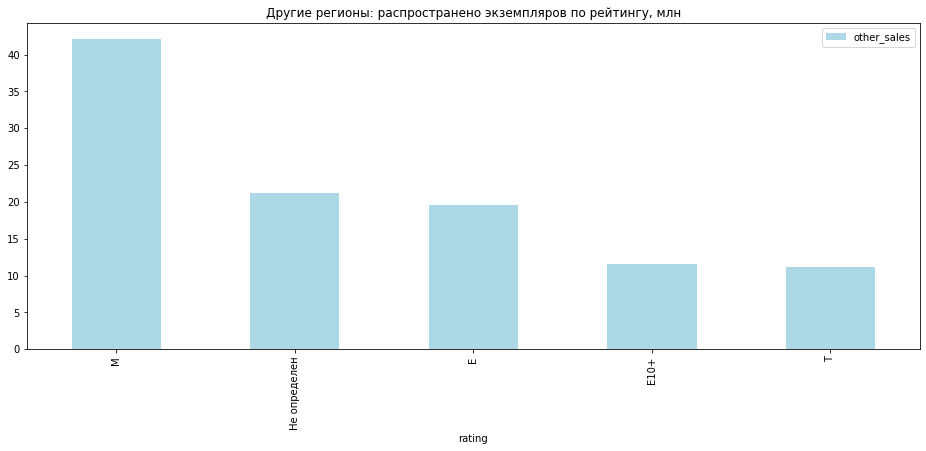

In [42]:
def GetPivotData(data, columnx, columns, agg_func, title, columns_title):
    printmd("**" + title + "**")
    for i in range(0,len(columns)):
        ddata = data.pivot_table(index=columns[i],values=columnx, \
                                 aggfunc=agg_func).sort_values(by=columnx, ascending=False)\
                .reset_index()
        display(ddata)
        ddata.plot(y=columnx, x=columns[i], kind='bar', figsize=(16, 6), color="lightblue")
        plt.title(columns_title[i])  
        plt.show()    
        
GetPivotData(home_games_dataset_aktual, 'na_sales', ['platform', 'family', 'genre', 'rating'],\
             'sum', 'Портрет пользователя из Северной Америки', ['Америка: распространено экземпляров по платформам, млн',
                                                                 'Америка: распространено экземпляров по семействам платформ, млн',
                                                                 'Америка: распространено экземпляров по жанрам, млн',
                                                                 'Америка: распространено экземпляров по рейтингу, млн'])

GetPivotData(home_games_dataset_aktual, 'eu_sales', ['platform', 'family', 'genre', 'rating'],\
             'sum', 'Портрет пользователя из Европы', ['Европа: распространено экземпляров по платформам, млн',
                                                                 'Европа: распространено экземпляров по семействам платформ, млн',
                                                                 'Европа: распространено экземпляров по жанрам, млн',
                                                                 'Европа: распространено экземпляров по рейтингу, млн'])

GetPivotData(home_games_dataset_aktual, 'jp_sales', ['platform', 'family', 'genre', 'rating'],\
             'sum', 'Портрет пользователя из Японии', ['Япония: распространено экземпляров по платформам, млн',
                                                                 'Япония: распространено экземпляров по семействам платформ, млн',
                                                                 'Япония: распространено экземпляров по жанрам, млн',
                                                                 'Япония: распространено экземпляров по рейтингу, млн'])

GetPivotData(home_games_dataset_aktual, 'other_sales', ['platform', 'family', 'genre', 'rating'],\
             'sum', 'Портрет пользователя из других регионов', ['Другие регионы: распространено экземпляров по платформам, млн',
                                                                 'Другие регионы: распространено экземпляров по семействам платформ, млн',
                                                                 'Другие регионы: распространено экземпляров по жанрам, млн',
                                                                 'Другие регионы: распространено экземпляров по рейтингу, млн'])

**Северная Америка** \
Пользователи предпочитают приставки от местного производителя - microsoft: их выбор делится между приставками xbox и xone. Чуть меньше они интересуются приставками от sony: ps3 и ps4. Предпочитают игры жанров action и shooter.Нелюбимый жанр - puzzle. Предпочитают игры для взрослых. Часто покупают игры, рейтинг которых не определен.

**Европа**\
Европейцы отдают предпочтения приставкам от sony, меньше интересуются приставками от microsoft и nintendo. Иногда играют в игры на PC. Любимые жанры не отличаются от американцев - action и shooter. Нелюбимый тоже - puzzle. Да и игры предпочитают из категории для взрослых, реже игры, категория которых не определена и  категории для всех. 

**Япония**\
Японцы предпочитают приставки sony и nintendo. Почти не интересуются приставками от microsoft. В топ 3 жанров врывается role-playing. Но и action, и shooter также популярны у пользователей. Нелюбят puzzle. Предпочитают игры, у которых не определена категория.

**Все остальные**\
Интересы совпадают с интересами европейцев.

## Проверка гипотез 

In [43]:
alpha = 0.05

def CheckHypothesis(data1, data2,equal):
    results = stats.ttest_ind(data1,data2,
                          equal_var = equal )
    if results.pvalue < alpha:
        printmd("**Отвергаем нулевую гипотезу.** ")
    else:
        printmd("**Не получилось отвергнуть нулевую гипотезу.** ") 
    print('p-значение: ', results) 
    print()

In [44]:
print('H0: Средние пользовательские рейтинги платформ Xbox One и PC равны')
print('H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются')
print()
print('Так как параметры совокупностей разные (xbox популярен в Америке, PC - везде, проставим equal_var = False')

CheckHypothesis(home_games_dataset_aktual[(home_games_dataset_aktual['platform'] == 'xone')&\
                                          (home_games_dataset_aktual['user_score'].isna() == False)]['user_score'],
                home_games_dataset_aktual[(home_games_dataset_aktual['platform'] == 'pc')&\
                                          (home_games_dataset_aktual['user_score'].isna() == False)]['user_score'],
                False)

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Так как параметры совокупностей разные (xbox популярен в Америке, PC - везде, проставим equal_var = False


**Не получилось отвергнуть нулевую гипотезу.** 

p-значение:  Ttest_indResult(statistic=1.0066375120724342, pvalue=0.3152887178240218)



Параметр equal_var указывает на равенство дисперсий выборок. В целом для больших выборок он особо не влияет на результаты, но если если нужно задать его явно, лучше посчитать дисперсии или обосновать их равенство/неравенство.

In [45]:
print('H0: Средние пользовательские рейтинги жанров Action и Sports равны')
print('H1: Средние пользовательские рейтинги жанров Action и Sports различаются')
print()
print('Так как параметры совокупностей одинаковые, проставим equal_var = True')

CheckHypothesis(home_games_dataset_aktual[(home_games_dataset_aktual['genre'] == 'action')&\
                              (home_games_dataset_aktual['user_score'].isna() == False)]['user_score'],
                home_games_dataset_aktual[(home_games_dataset_aktual['genre'] == 'sports')&\
                              (home_games_dataset_aktual['user_score'].isna() == False)]['user_score'],
                False)

H0: Средние пользовательские рейтинги жанров Action и Sports равны
H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Так как параметры совокупностей одинаковые, проставим equal_var = True


**Отвергаем нулевую гипотезу.** 

p-значение:  Ttest_indResult(statistic=10.06524714346841, pvalue=3.4428011454853594e-19)



# Общий вывод

В 1980-е появились игровые платфомы, в 1990-е они начали развиваться, а в 2000-х набирать популярность. Пик популярности наступил в 2008-2009, а далее пошел на спад.

**Стоит отметить**, что:\
    * интерес спадает как у разработчиков игр, так и у пользователей, портативные консоли почти полностью потеряли интерес пользователей - это может быть связано с появлением смартфонов и планшетов\
    * за всю историю игровых платформ, самые популярные - ps2 и ds. Примечательно, что одна из них домашняя, а вторая - портативная\
    * Американцы - самые активные пользователи игровых платформ\
    * для домашних платформ написано в 2 раза больше игр, чем для портативных. А экземпляров распространено в 3.5 раза больше\
    * популярность приставок можно рассматривать в разрезе семейств - так можно увидеть гигантов рынка. А так же то, что самое популярное семейство - sony, nintendo, microsoft: 44.3% игр выпущено для приставок из семейства sony, 23.36% - для приставок от nintendo, 20% - microsoft. В разрезе количества распространенных экземпляров соотношение сохраняется\
    * время жизни платформы - от появления до потреи интереса пользователей - 10 лет\
    
**Портативные платформы**\
    * явный лидер - nintendo - 68.5% игр написано для них, 82.42% распространенных экземпляров\
    * на второй позиции - sony и 31.3% написанных под нее игр и 17,5% экземпляров\
    * самая популярная консоль за всю историю - ds, утратила популярность в 2013-2014 годах как среди разработчиков, так и среди пользователей\
    * спад интереса слишком сильный, ох уж эти мобильные игры.\
    
**Домашние платформы**\
SONY: начали резко заполонять рынок в 1995, в 2005 достигли пика популярности, после этого идет стабильный спад, но они все же удерживают за собой лидество на рынке домашних игровых платформ.\

NINTENDO: вышли на рынок в 1983, в 1990-е начали получать популярность. Резкий скачок популярности произошел в 2007-2009, а в 2010 и далее резкий спад и почти полная потеря интереса пользователей.  \  

MICROSOFT: самый молодой гигант в сфере игровых платформ. Вышли на рынок в 2000, почти сразу завоевали своих клиентов, набирали популярность до 2010, попали под влияние общих тенденций - спад. Примечательно, что завоевать популярность на Японском рынке не смогли. А вот держаться на одном уровне с SONY на Американском - получилось.\

Стоит отметить:\
    * cамые популяные жанры - action, shooter, sports\
    * меньше всего интереса у пользователей к играм жанров puzzle, strategy, simulation\
    * эти позиции сохраняются со временем, иногда смещаяся на позицию выше или ниже\

При смене поколений происходит спад интереса, а затем прирост.
На конец 2016 года наблюдается спад интереса ко всем играм. Пользователи могли присытиться уже существующими играми, перейти на мобильные игры или ожидать выхода платформы нового поколения.

**Оценки критиков и пользователей** \
    * интересно, что самые высокие оценки - у игр для PC, и с точки зрения критиков, и с точки зрения пользователей \
    * самые низкие - у WII, возможно за счет того, что она была очень популярна у пользователей, и из-за этого для писалось очень много не очень качественных игр \
    * критики ставят высокие оценки играм для платформ семейства microsoft в период 2013-2016\
    * при смене поколений можно увидеть как падают оценки игр для платформ уходящего поколения, и нарастают у игр для платформ нового поколения \
    * стабильно хорошие оценки пользователи ставят играм для платформ sony, критики ставили более высокие оценки играм для sony в 2006-2011 \
    * хотя пользователи платформ nintendo ставили хорошие оценки играм в 2015 году, интерес к играм падал как со стороны разработчиков, так и со стороны пользователей \
    * интерес к приставкам 8 поколения недостаточен для того, чтобы достичь пика 2008-2009 годов \
    * критики раньше перестают ставить оценки играм для платформ уходящих поколений чем пользоватеи примерно на 1 год \
    * на продажи влияют как оценки критиков, так и пользователей, но критиков сильнее \
    
**Пользователи**\
**Северная Америка** \
Пользователи предпочитают приставки от местного производителя - microsoft: их выбор делится между приставками xbox и xone. Чуть меньше они интересуются приставками от sony: ps3 и ps4. Предпочитают игры жанров action и shooter.Нелюбимый жанр - puzzle. Предпочитают игры для взрослых. Часто покупают игры, рейтинг которых не определен.

**Европа**\
Европейцы отдают предпочтения приставкам от sony, меньше интересуются приставками от microsoft и nintendo. Иногда играют в игры на PC. Любимые жанры не отличаются от американцев - action и shooter. Нелюбимый тоже - puzzle. Да и игры предпочитают из категории для взрослых, реже игры, категория которых не определена и  категории для всех. 

**Япония**\
Японцы предпочитают приставки sony и nintendo. Почти не интересуются приставками от microsoft. В топ 3 жанров врывается role-playing. Но и action, и shooter также популярны у пользователей. Нелюбят puzzle. Предпочитают игры, у которых не определена категория.

**Все остальные**\
Интересы совпадают с интересами европейцев.
    
    
    
Итог: потенциально популярный продукт - игра для платформы sony ps4 в жанре shooter с рейтингом M.
    

    
    
    
    
    